<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-f23/blob/main/2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datensatz vorbereiten - Dummies, Skalen



Im ersten Schritt wird der Datensatz aus dem ersten Notebook unter dem Namen 'maindf' gespeichert. Hierfür muss der Datensatz "1_Cleansing_Join" aus dem vorherigen Notebook geladen werden.



In [7]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
maindf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/files/1_Cleansing_Join.csv")
#maindf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & ML/Projekt/1_Cleansing_Join_final.csv')
#maindf = pd.read_csv('1_Cleansing_Join.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Nach inhaltlicher Überlegung ist klar geworden, dass die Spalten 'arrival_date','departure_date', 'night_index' und 'arrival_date_week_number' für den Input von Klassifikationsmodellen irrelevant sind. Hiermit werden sie aus dem Dataframe gelöscht

In [8]:
maindf = maindf.drop(columns=['arrival_date','departure_date', 'night_index', 'arrival_date_week_number'])

In [9]:
maindf.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
stay_nights_sum                   0
adults                            0
children                          0
babies                            0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
total_of_special_requests         0
city                              0
average_temperature               0
average_temp_min                  0
average_temp_max                  0
average_prcp                

Im folgenden Schritt werden bereits alle binären Variablen auch zu solch einem Datentyp geändert.

In [10]:
maindf['is_canceled'] = maindf['is_canceled'].astype('uint8')
maindf['is_repeated_guest'] = maindf['is_repeated_guest'].astype('uint8')
maindf['holiday_flag'] = maindf['holiday_flag'].astype('uint8')
maindf['agent'] = maindf['agent'].astype('uint8')


Nun müssen alle nicht ordinalen, kategoriellen Features zu dummy-Variablen umgebaut werden.

In [11]:
maindf = pd.concat([
    maindf.drop(columns=['city']), # remove the columns we one-hot-encode
    pd.get_dummies(maindf.city, drop_first=True, prefix='city'),
], axis=1) # join the one-hot-encoded columns by concatenating them side-by-side (axis 1)

In [12]:
maindf = pd.concat([
    maindf.drop(columns=['distribution_channel']), # remove the columns we one-hot-encode
    pd.get_dummies(maindf.distribution_channel, drop_first=True, prefix='distribution_channel'),
], axis=1) # join the one-hot-encoded columns by concatenating them side-by-side (axis 1)

In [13]:
maindf = pd.concat([
    maindf.drop(columns=['deposit_type']), # remove the columns we one-hot-encode
    pd.get_dummies(maindf.deposit_type, drop_first=True, prefix='deposit_type'),
], axis=1) # join the one-hot-encoded columns by concatenating them side-by-side (axis 1)

In [14]:
maindf = pd.concat([
    maindf.drop(columns=['customer_type']), # remove the columns we one-hot-encode
    pd.get_dummies(maindf.customer_type, drop_first=True, prefix='customer_type'),
], axis=1) # join the one-hot-encoded columns by concatenating them side-by-side (axis 1)

In [15]:
maindf

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,...,city_Lisbon,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,July,1,0,0,0,2,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0,737,2015,July,1,0,0,0,2,0.0,...,0,1,0,0,0,0,0,0,1,0
2,0,7,2015,July,1,0,1,1,1,0.0,...,0,1,0,0,0,0,0,0,1,0
3,0,13,2015,July,1,0,1,1,1,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,July,1,0,2,2,2,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111409,0,23,2017,August,30,2,5,7,2,0.0,...,1,0,0,1,0,0,0,0,1,0
111410,0,102,2017,August,31,2,5,7,3,0.0,...,1,0,0,1,0,0,0,0,1,0
111411,0,34,2017,August,31,2,5,7,2,0.0,...,1,0,0,1,0,0,0,0,1,0
111412,0,109,2017,August,31,2,5,7,2,0.0,...,1,0,0,1,0,0,0,0,1,0


Das Feature country entpuppt sich als Problem, da hier über 175 dummy variablen gebildet werden würden

In [16]:
len(maindf.country.value_counts())

176

Wir sehen aber bereits bei folgender Ansicht dass sich die meisten Buchungen höchstwahrscheinlich auf einige wenige Länder fokussieren werden.

In [17]:
maindf.country.value_counts()

PRT    43547
GBR    11278
FRA    10179
ESP     8287
DEU     7171
       ...  
VGB        1
BDI        1
PLW        1
BHS        1
CYM        1
Name: country, Length: 176, dtype: int64

In [18]:
maindf.groupby(['country']).sum()

<ipython-input-18-7a783e7a63f7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  maindf.groupby(['country']).sum()


,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,babies,...,city_Lisbon,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
country,,,,,,,,,,,,,,,,,,,,,
ABW,0,252,4033,32,2,5,7,5,0.0,0,...,2,0,0,2,0,0,0,0,2,0
AGO,205,8349,709705,5415,823,2086,2909,557,77.0,5,...,328,144,0,206,0,0,0,2,325,18
AIA,0,0,2016,8,2,2,4,2,2.0,0,...,1,0,0,1,0,0,0,0,1,0
ALB,2,811,20162,159,10,26,36,19,0.0,1,...,7,2,0,8,0,0,0,0,7,3
AND,5,329,14116,103,9,22,31,15,4.0,0,...,2,1,0,6,0,0,0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VGB,1,109,2016,5,1,2,3,2,0.0,0,...,1,0,0,1,0,0,0,0,1,0
VNM,2,673,16131,152,5,16,21,17,0.0,0,...,6,0,0,8,0,0,0,0,7,1
ZAF,30,5409,157283,1249,71,160,231,140,17.0,0,...,60,15,0,63,0,0,0,1,70,7


Hier dann noch mal eine Ansicht aller Länder mit ihrer dazugehörigen Anzahl an Buchungen. Wir sehen dass relativ schnell schon keine vierstelligen Buchungsanzahlen mehr vorhanden sind. Aufgrundessen werden alle Länder aus dem Datensatz geworfen die n<1000 Buchungen aufweisen. Dieser modifizierte Dataframe wird maindf_c genannt

In [19]:
country_counts = maindf['country'].value_counts()
country_names = country_counts.index.tolist()
counts = country_counts.tolist()

result = list(zip(country_names, counts))
print(result)

[('PRT', 43547), ('GBR', 11278), ('FRA', 10179), ('ESP', 8287), ('DEU', 7171), ('ITA', 3635), ('IRL', 3327), ('BEL', 2248), ('BRA', 2187), ('USA', 2048), ('NLD', 2020), ('CHE', 1703), ('CN', 1269), ('AUT', 1190), ('SWE', 1004), ('CHN', 981), ('POL', 884), ('ISR', 667), ('NOR', 593), ('RUS', 577), ('ROU', 494), ('FIN', 436), ('DNK', 421), ('AUS', 418), ('AGO', 352), ('LUX', 284), ('MAR', 237), ('TUR', 230), ('HUN', 229), ('ARG', 207), ('JPN', 187), ('CZE', 158), ('IND', 146), ('KOR', 128), ('GRC', 110), ('SRB', 100), ('DZA', 97), ('HRV', 88), ('IRN', 81), ('MEX', 80), ('EST', 79), ('ZAF', 78), ('LTU', 75), ('BGR', 74), ('NZL', 72), ('COL', 69), ('UKR', 68), ('MOZ', 66), ('CHL', 63), ('SVK', 61), ('THA', 59), ('ISL', 56), ('LVA', 53), ('SVN', 52), ('ARE', 50), ('TWN', 49), ('SAU', 48), ('PHL', 40), ('CYP', 40), ('TUN', 38), ('SGP', 38), ('IDN', 35), ('NGA', 33), ('EGY', 32), ('LBN', 30), ('HKG', 29), ('PER', 28), ('MYS', 28), ('URY', 27), ('ECU', 27), ('BLR', 26), ('CPV', 24), ('VEN', 24

In [20]:
keep_countries = ['PRT', 'GBR', 'Fra', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'USA', 'NLD', 'CHE', 'CN', 'AUT', 'SWE']
maindf_c = maindf[maindf['country'].isin(keep_countries)]

Mit folgenden 2 Zeilen sehen wir, dass gut 20000 Einträge durch diesen Schritt verloren gehen. Anschließend können jedoch Dummies gebildet werden und es sind anstatt 175 nur noch 14

In [21]:
len(maindf)

111414

In [22]:
len(maindf_c)

90914

In [23]:
maindf_c = pd.concat([
    maindf_c.drop(columns=['country']), # remove the columns we one-hot-encode
    pd.get_dummies(maindf_c.country, drop_first=True, prefix='country'),
], axis=1) # join the one-hot-encoded columns by concatenating them side-by-side (axis 1)

Da der 'arrival_date_month' noch in einem String vorliegt, werden die Werte nun durch die Monatszahlen ausgetauscht um eine bessere Verarbeitung durch das spätere Modell zu gewährleisten.

In [24]:
arrival_date_month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
maindf_c.arrival_date_month = maindf_c.arrival_date_month.apply(lambda x: arrival_date_month_mapping[x])

wir sehen dass alle features in dem gewünschten Datenformat vorliegen, nur children erklärt sich uns nicht ganz.

In [25]:
maindf_c.dtypes

is_canceled                         uint8
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
stay_nights_sum                     int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   uint8
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                               uint8
days_in_waiting_list                int64
adr                               float64
total_of_special_requests           int64
average_temperature               float64
average_temp_min                  float64
average_temp_max                  float64
average_prcp                      float64
holiday_flag                      

Da, wie hier zu sehen lediglich integer-Werte in der 'children' Spalte vorhanden sind, wird das Datenformat auch zu diesem geändert.

In [26]:
maindf_c.children.value_counts()

0.0     84487
1.0      3645
2.0      2732
3.0        49
10.0        1
Name: children, dtype: int64

In [27]:
maindf_c['children'] = maindf_c['children'].astype('int64')


Zudem werden zwei dummies umbenannt, damit später keine Probleme durch dessen Namen aufkommen. Bei beiden sind Satzzeichen vorhanden, mit denen Python in gewissen Codeausführungen nicht umgehen kann. Es wird das Leerzeichen, sowie das slash zu einem Unterstrich geändert. Somit haben wir bei allen features einen zusammenhängenden string.

In [28]:
maindf_c= maindf_c.rename(columns={'deposit_type_Non Refund': 'deposit_type_Non_Refund'})


In [29]:
maindf_c= maindf_c.rename(columns={'distribution_channel_TA/TO': 'distribution_channel_TA_TO'})


In [30]:
maindf_c.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
stay_nights_sum                   0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
days_in_waiting_list              0
adr                               0
total_of_special_requests         0
average_temperature               0
average_temp_min                  0
average_temp_max                  0
average_prcp                      0
holiday_flag                      0
city_Lisbon                       0
distribution_channel_Direct       0
distribution_channel_GDS          0
distribution_channel_TA_TO  

Wenn wir uns die durchschnittlichen Features, gruppiert nach den Ausprägungen unserer Zielvariablen anschauen, kann man schon erste kleine Ableitungen erkennen. Beispielsweise ist im Schnitt die Leadtime deutlich höher bei den Buchungen, welche gecancelt werden.

In [31]:
maindf_c.groupby('is_canceled').mean()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,babies,...,country_CN,country_DEU,country_ESP,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_SWE,country_USA
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,85.618231,2016.131418,6.565634,15.952558,0.970159,2.532400,3.502559,1.871863,0.106375,0.011528,...,0.019026,0.111586,0.114660,0.167201,0.046768,0.043206,0.030647,0.322462,0.014564,0.028998
1,154.392387,2016.127060,6.699561,15.688007,0.907866,2.527086,3.434953,1.909251,0.095594,0.004020,...,0.006762,0.032424,0.057767,0.062771,0.022148,0.035405,0.010249,0.701291,0.006043,0.013337


# Prüfung auf Multikollinearität

Um Multikollinearität ausschließen zu können wird der VIF-Faktor für die Features berechnet.

In [32]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for regression model using 'rating' as response variable
yy, XX = dmatrices('is_canceled ~ lead_time+arrival_date_year+arrival_date_month+arrival_date_day_of_month+stays_in_weekend_nights+stays_in_week_nights+stay_nights_sum+adults+children+babies+is_repeated_guest+previous_cancellations+previous_bookings_not_canceled+booking_changes+agent+days_in_waiting_list+adr+total_of_special_requests+average_temperature+average_temp_min+average_temp_max+average_prcp+holiday_flag+city_Lisbon+distribution_channel_Direct+distribution_channel_GDS+distribution_channel_TA_TO+distribution_channel_Undefined+deposit_type_Non_Refund+deposit_type_Refundable+customer_type_Group+customer_type_Transient+customer_type_Transient-Party+country_BEL+country_BRA+country_CHE+country_CN+country_DEU+country_ESP+country_GBR+country_IRL+country_ITA+country_NLD+country_PRT+country_SWE+country_USA', data=maindf_c, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = XX.columns

#calculate VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]

#view VIF for each predictor variable
print(vif_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                          variable           VIF
0                        Intercept  1.435203e+07
1                        lead_time  1.695892e+00
2                arrival_date_year  1.806875e+00
3               arrival_date_month  1.767246e+00
4        arrival_date_day_of_month  1.020880e+00
5          stays_in_weekend_nights           inf
6             stays_in_week_nights           inf
7                  stay_nights_sum           inf
8                           adults  1.103958e+00
9                         children  1.145184e+00
10                          babies  1.024268e+00
11               is_repeated_guest  1.297380e+00
12          previous_cancellations  1.069021e+00
13  previous_bookings_not_canceled  1.274397e+00
14                 booking_changes  1.056065e+00
15                           agent  1.546678e+00
16            days_in_waiting_list  1.058926e+00
17                             adr  1.640237e+00
18       total_of_special_requests  1.200582e+00
19             avera

Nun wird der VIF-Wert in ein anderes Format gebracht, um eine einfachere Interpretation zu gewährleisten. Vor allem die Features, welche die Temperatur abbilden zeigen einen extrem hohen VIF-Wert, was auch vollkommen logisch ist. Sie sind stark voneinander abhängig. Darum wird entschieden für die Temperatur lediglich die 'average_temperature' zu behalten. Außerdem wird sich dafür entschieden lediglich die 'stay_nights_sum' beizubehalten, da eine starke Abhängigkeit zu den nächten in der Woche und am Wochenende besteht. Inhaltlich geht kaum, bis gar nichts verloren mit dem löschen der zwei Variablen.

In [33]:
# Funktion zur Formatierung der Zahlen
def format_number(num):
    return "{:.8f}".format(num)

# Anwendung der Funktion auf die Spalte 'Zahlen'
vif_df['VIF'] = vif_df['VIF'].apply(format_number)

# Ausgabe des formatierten DataFrames
print(vif_df)

                          variable                VIF
0                        Intercept  14352030.71952586
1                        lead_time         1.69589182
2                arrival_date_year         1.80687467
3               arrival_date_month         1.76724591
4        arrival_date_day_of_month         1.02087955
5          stays_in_weekend_nights                inf
6             stays_in_week_nights                inf
7                  stay_nights_sum                inf
8                           adults         1.10395792
9                         children         1.14518426
10                          babies         1.02426769
11               is_repeated_guest         1.29737999
12          previous_cancellations         1.06902097
13  previous_bookings_not_canceled         1.27439744
14                 booking_changes         1.05606513
15                           agent         1.54667751
16            days_in_waiting_list         1.05892577
17                          

In [34]:
maindf_c = maindf_c.drop(columns=['average_temp_min', 'average_temp_max'])

In [35]:
maindf_c = maindf_c.drop(columns=['stays_in_week_nights', 'stays_in_weekend_nights'])

Hier wird der vorbereitete Datensatz als csv-Datei heruntergeladen, damit im nächsten Notebook für die Regression darauf zurückgegriffen werden kann.

In [36]:
maindf_c.to_csv('2_Data_for_Modeltraining.csv', header=True, index=False)

# Skalieren und Explorieren des Datensatzes

Zunächst wird der Datensatz skaliert, wobei die Zielvariable ausgenommen wird.

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
maindf_scaled = maindf_c.copy()
columns_to_scale = list(set(maindf_c.columns) - {'is_canceled'})
maindf_scaled[columns_to_scale] = scaler.fit_transform(maindf_c[columns_to_scale])

Nun werden die Spalten in 'encoded'- und 'numerical'- columns eingeteilt, um sie im darauf folgenden Schritt zu visualisieren.

In [38]:
encoded_columns = ['is_canceled','arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'agent', 'is_repeated_guest', 'holiday_flag', 'city_Lisbon', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_Undefined', 'distribution_channel_TA_TO', 'deposit_type_Non_Refund', 'deposit_type_Refundable', 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party',
       'country_BEL', 'country_BRA', 'country_CHE', 'country_CN', 'country_DEU', 'country_ESP', 'country_GBR', 'country_IRL', 'country_ITA', 'country_NLD', 'country_PRT', 'country_SWE', 'country_USA']
numerical_columns = list(set(maindf_c.columns) - set(encoded_columns))

<ipython-input-39-cb9a405dbdb1>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure() # required if we want to plot multiple figures from the same cell


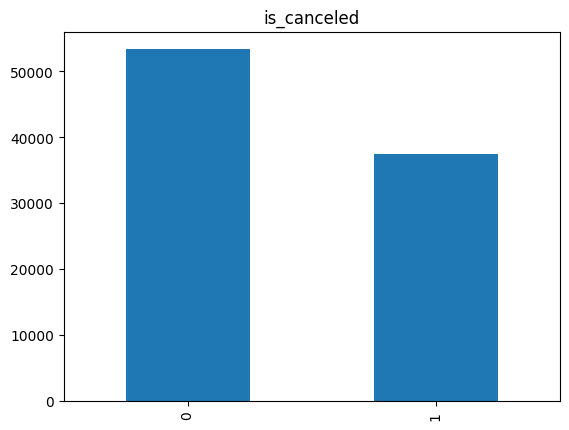

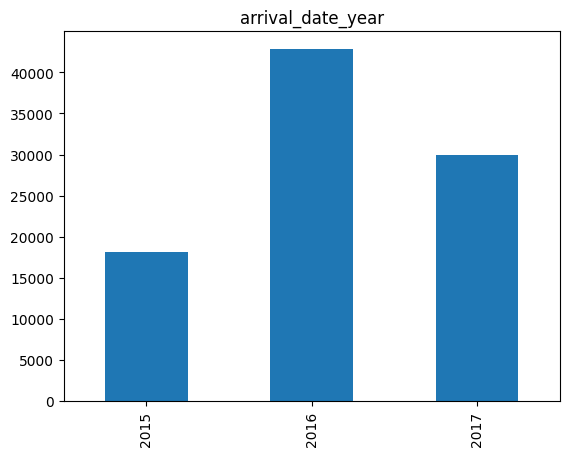

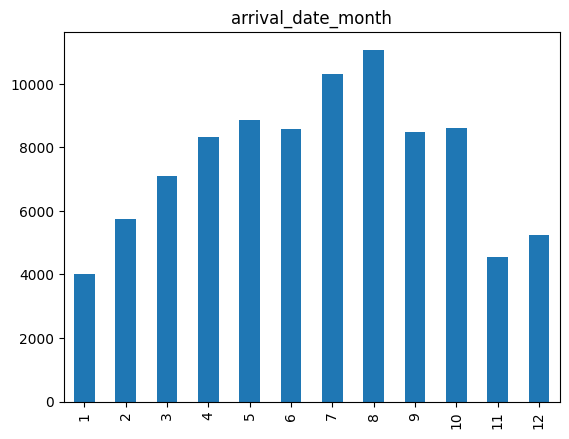

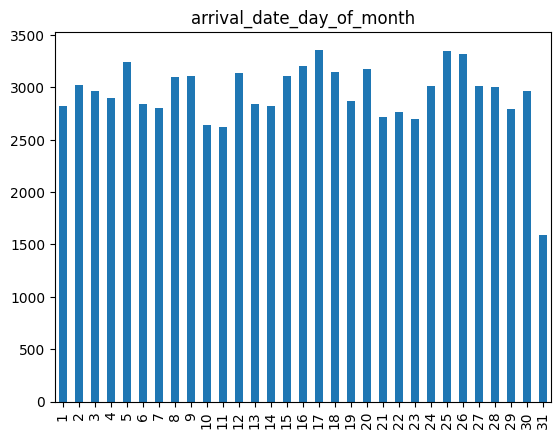

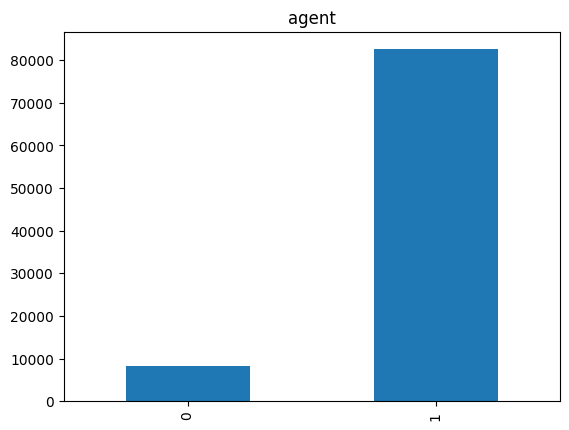

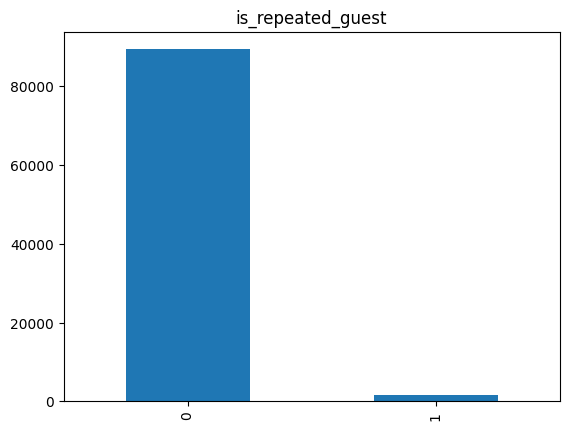

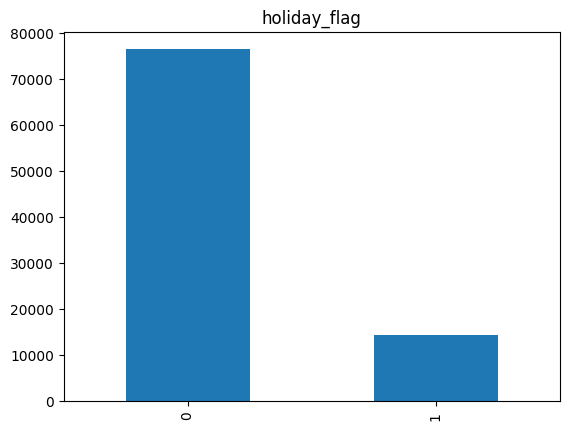

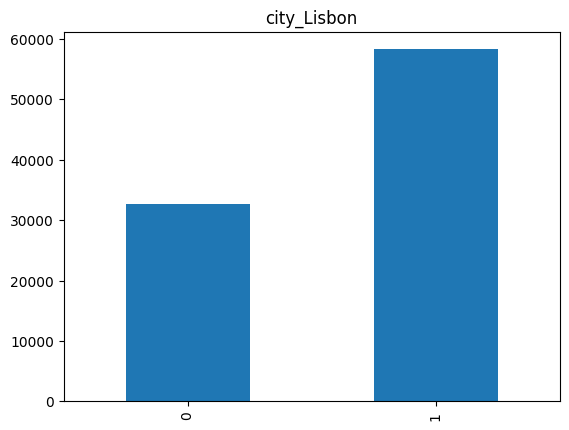

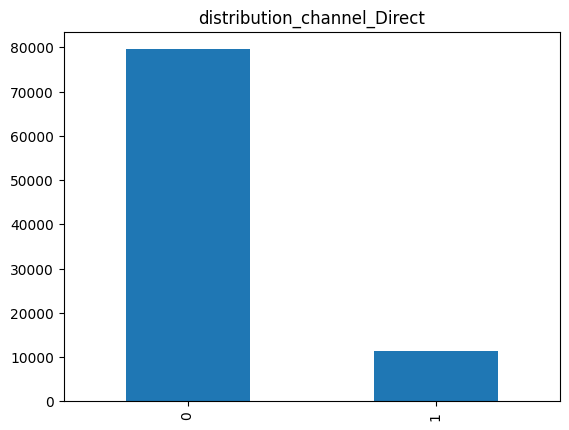

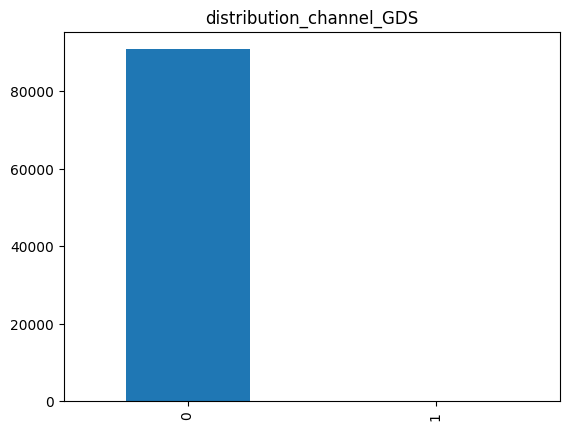

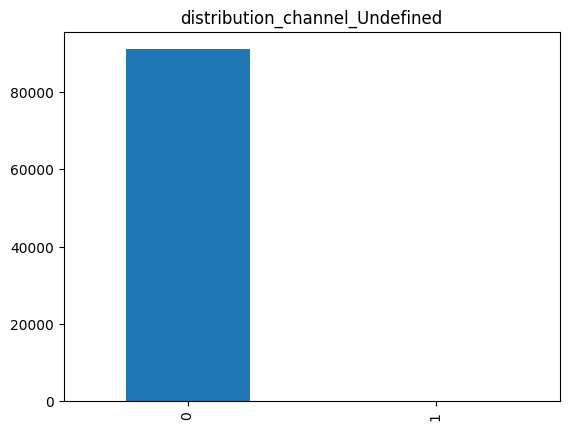

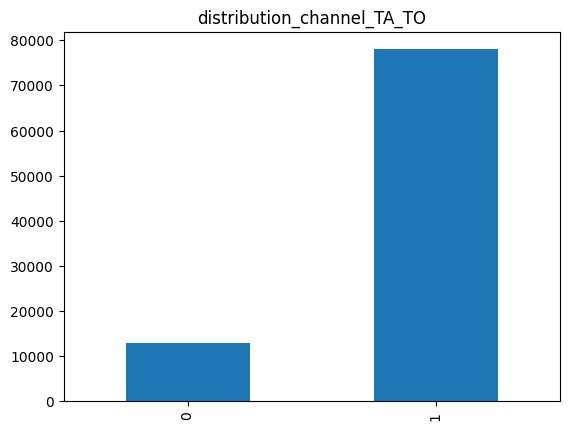

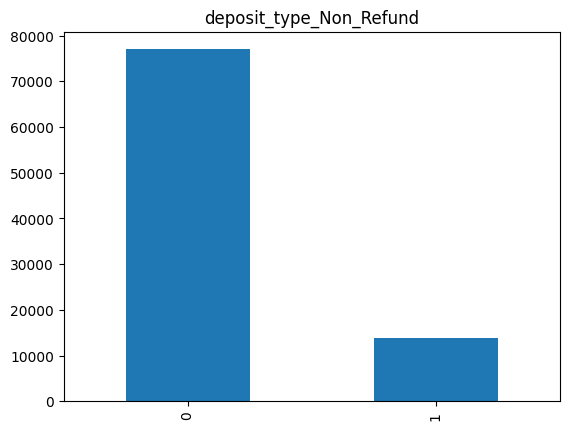

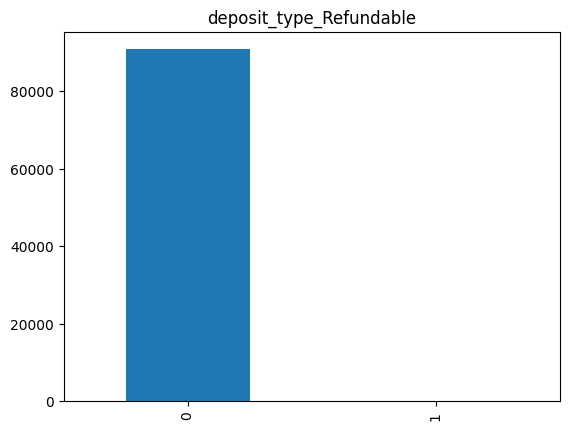

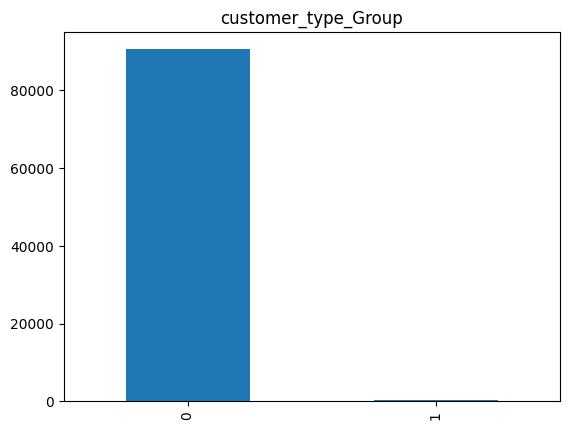

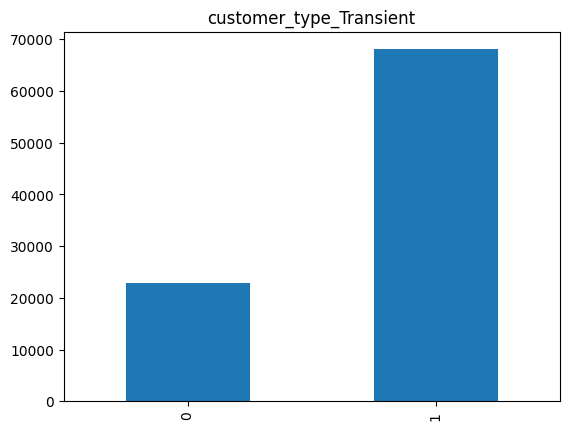

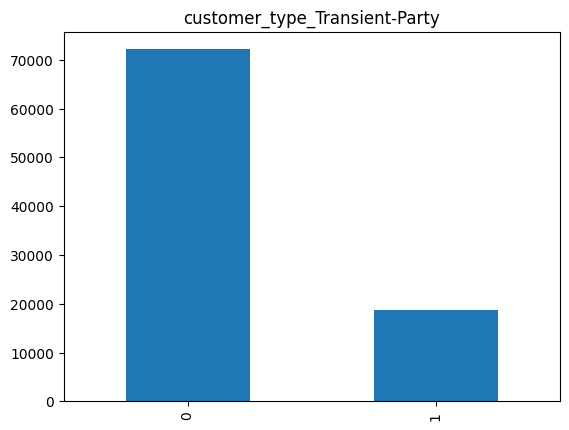

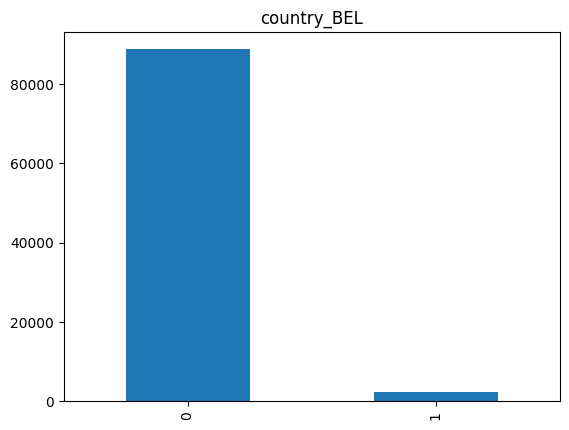

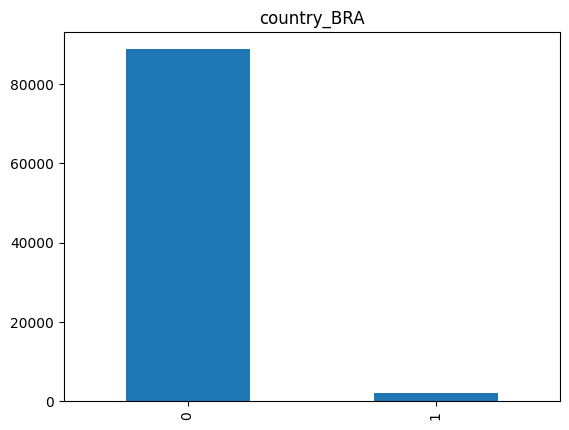

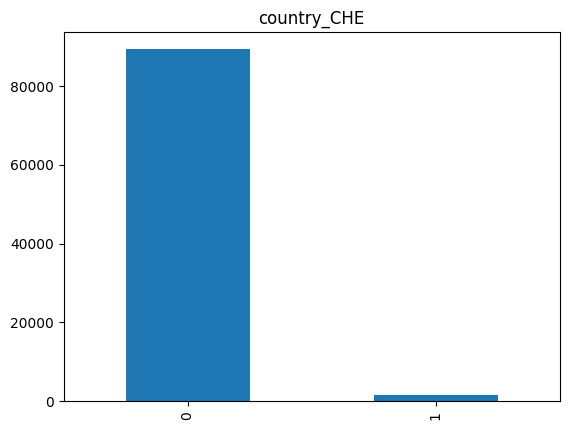

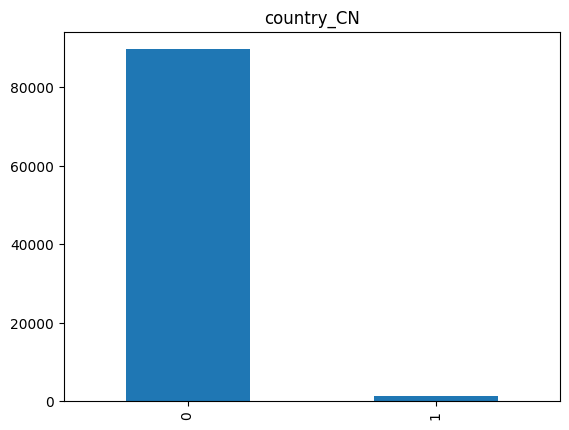

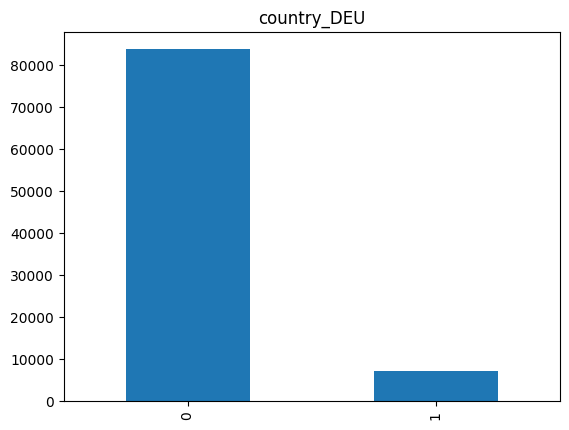

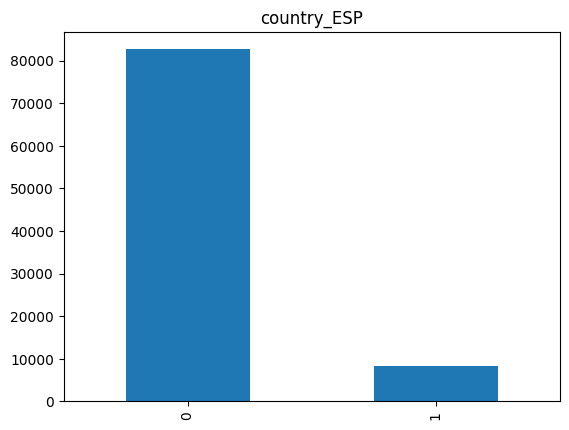

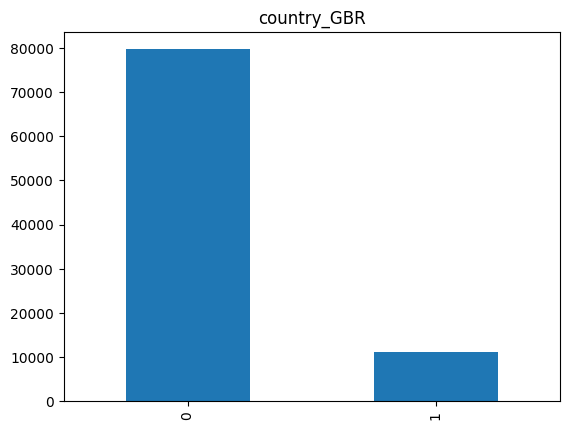

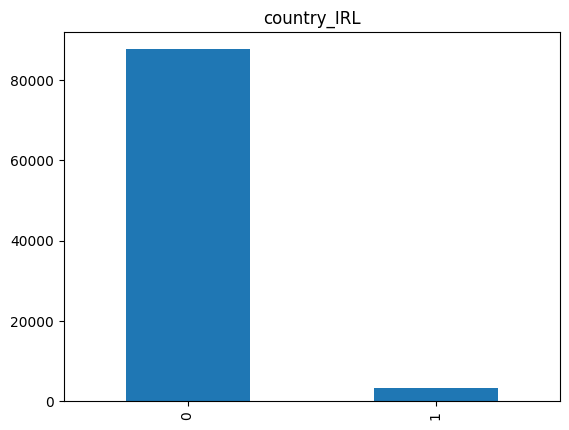

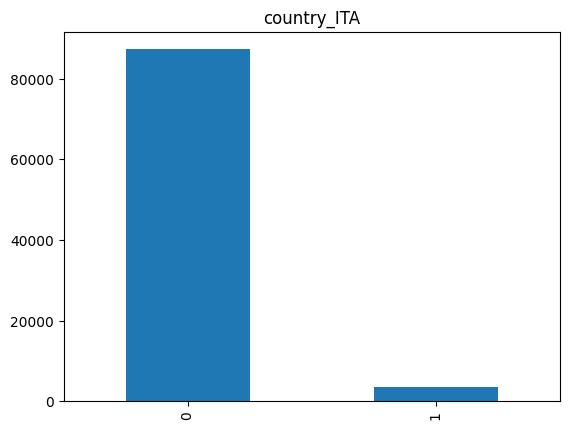

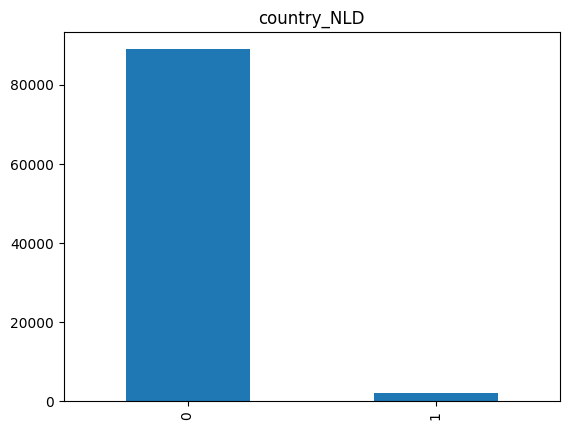

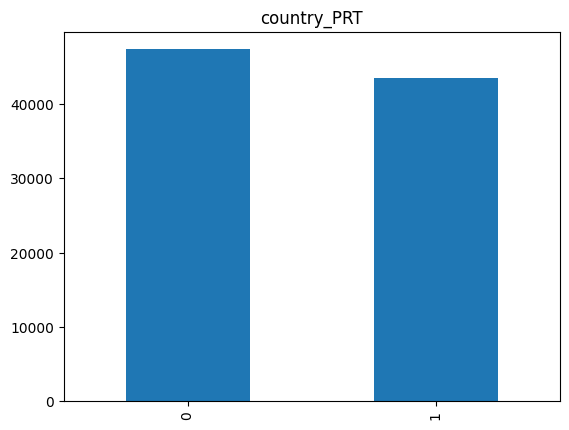

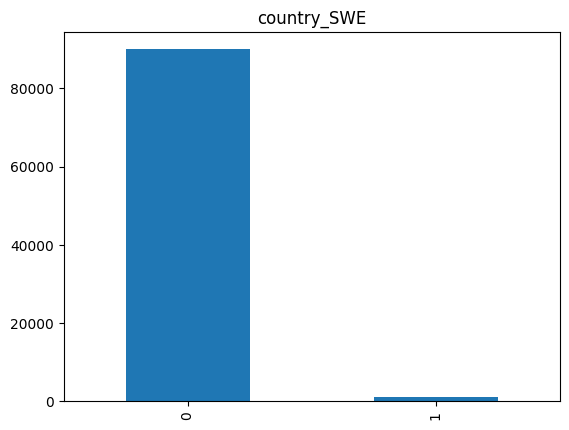

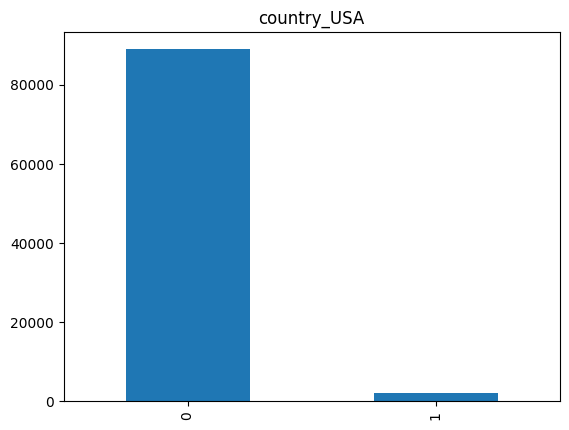

In [39]:
import matplotlib.pyplot as plt
for column in encoded_columns:
  fig = plt.figure() # required if we want to plot multiple figures from the same cell
  maindf_c[column].value_counts(sort=False).sort_index().plot(kind='bar', title=column)

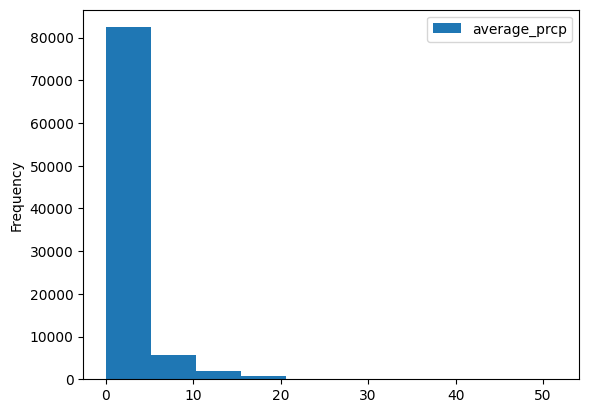

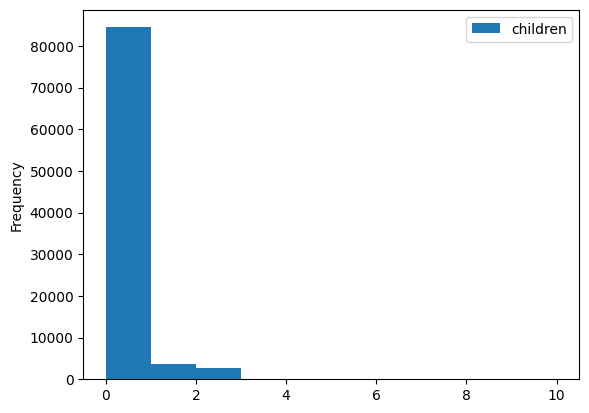

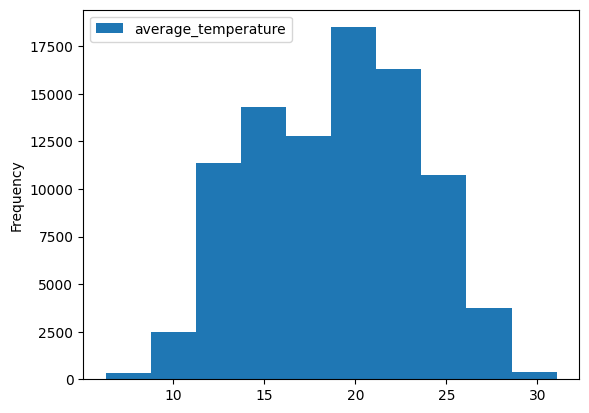

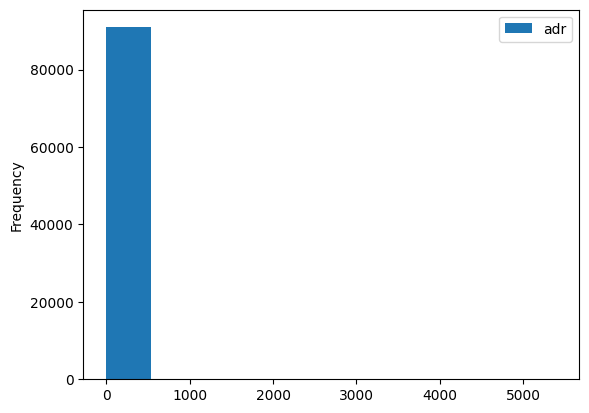

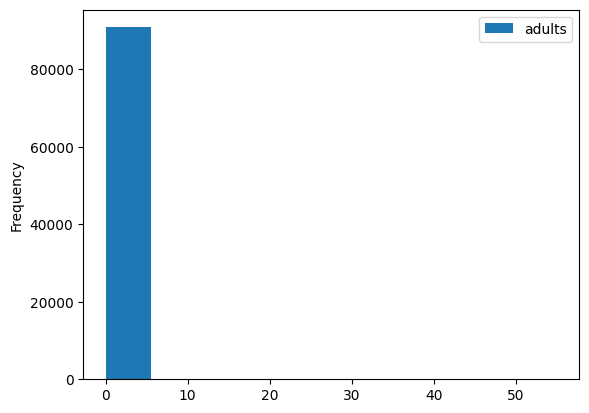

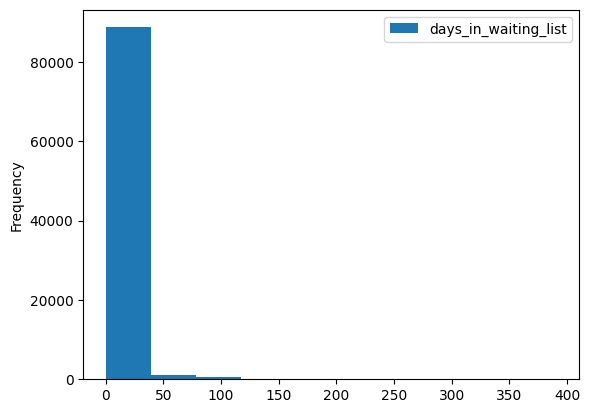

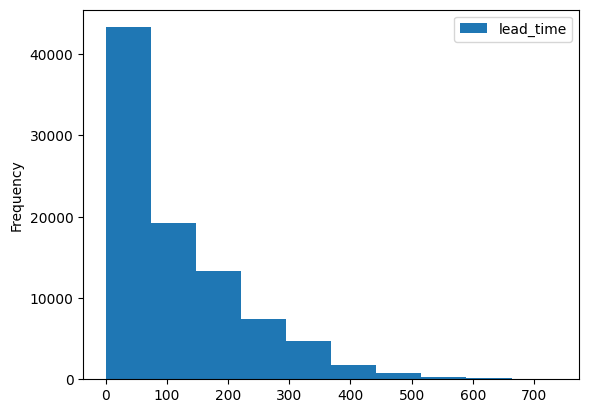

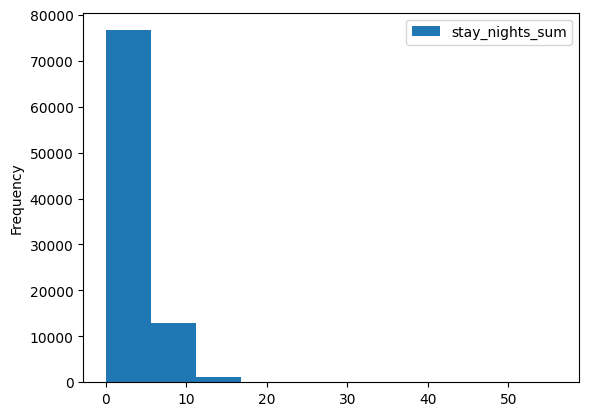

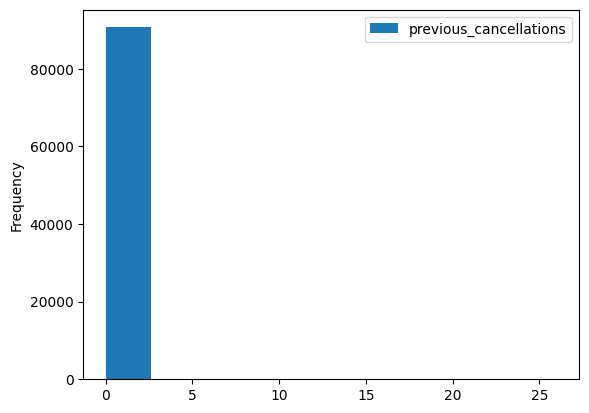

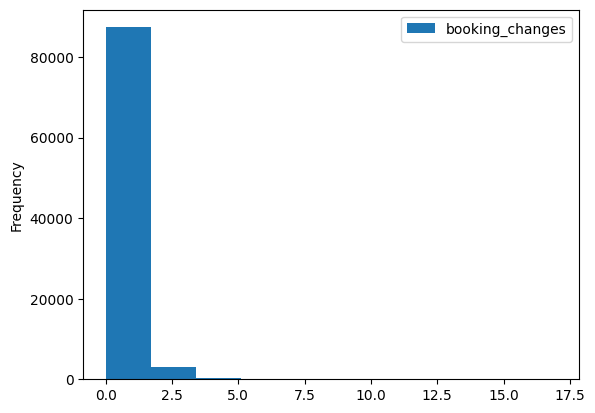

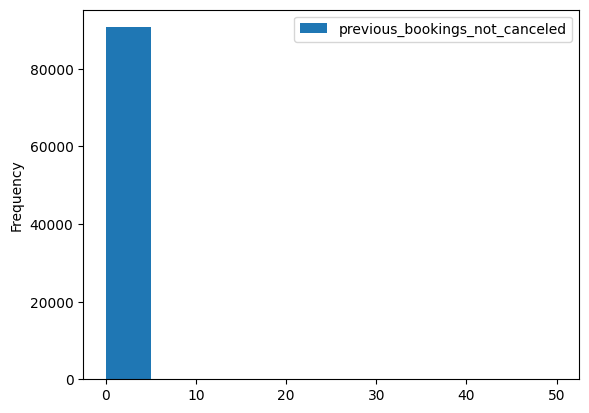

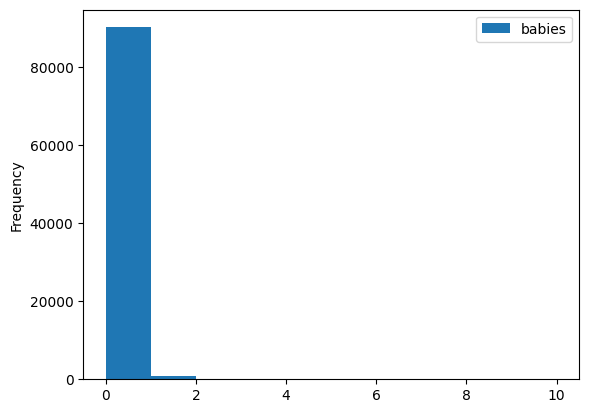

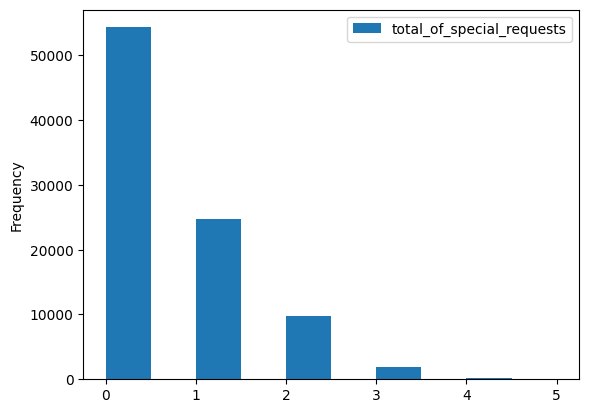

In [40]:
for column in numerical_columns:
  maindf_c.plot(kind='hist', y=column)

Hier wird eine Korrelationsmatrix zwischen allen noch bestehenden Features erstellt. Dabei sind hohe Korrelationen, ähnlich wie bei einer Heatmap, rot gekennzeichnet. Man kann vereinzelt stärkere und schwächere Korrelationen erkennen, aber viele Features verhalten sich neutral zueinander.

<Axes: >

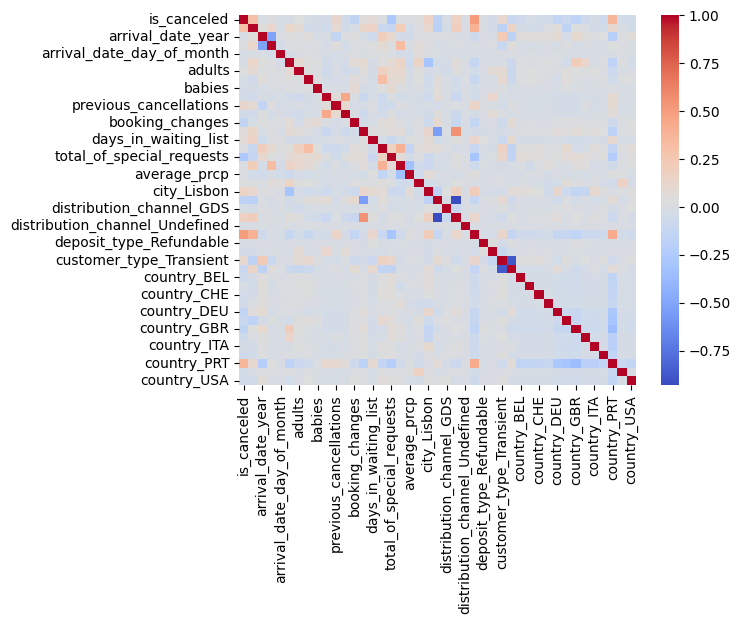

In [41]:
import seaborn as sns
# .corr() calculates the correlation between each column in our dataframe
sns.heatmap(maindf_c.corr(), annot=False, cmap='coolwarm')

Im folgenden Schritt werden für das Modelltraining die Variablen X und y gebildet, wobei y die Zielvariable enthält (ob eine Buchung gecancelt wurde).

In [42]:
X = maindf_c.drop(columns='is_canceled')
y = maindf_c.is_canceled

In [43]:
X_scaled = maindf_scaled.drop(columns='is_canceled')
y_scaled = maindf_scaled.is_canceled

Nun wird der Train Test Split durchgeführt, damit die folgenden Modelle trainiert und validiert werden können. Hier wird sich für eine gängige Aufteilung Entschieden, wobei die Testdaten 20 % ausmachen.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y, shuffle = True)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, stratify = y_scaled, shuffle = True)

Da deutlich mehr Personen den Hotelaufenthalt tatsächlich angetreten haben, als dass gecancelt wurde, wird im folgenden Schritt durch den SMOTE-Algorithmus ein ballanciertes Lernen gewährleistet. Es werden synthetische Muster gebildet und der unterrepräsentierten Ausprägung zugeordnet, sodass die Trainingsdaten ballanciert sind.

In [45]:
pip install imbalanced-learn

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train,y_train)
X_scaled_smote, y_scaled_smote = smote.fit_resample(X_train_scaled,y_train_scaled)

In [47]:
columns = X_train.columns

X_scaled_smote = pd.DataFrame(data=X_scaled_smote, columns=columns)
y_scaled_smote = pd.DataFrame(data=y_scaled_smote, columns=['is_canceled'])

print("length of oversampled data is ",len(X_scaled_smote))
print("Number of no cancellation in oversampled data",len(y_scaled_smote[y_scaled_smote['is_canceled']==0]))
print("Number of cancellation",len(y_scaled_smote[y_scaled_smote['is_canceled']==1]))

length of oversampled data is  85358
Number of no cancellation in oversampled data 42679
Number of cancellation 42679


Abschließend wird die Evaluation-Function definiert, anhand später die unterschiedlichen Modelle verglichen werden können.

In [48]:
from sklearn.metrics import classification_report
def evaluate(clf, X_test_scaled, y_true):
  y_pred = clf.predict(X_test_scaled)
  print(classification_report(y_true, y_pred))

# Regressionsmodelle

Bei dieser Fragestellung haben wir uns für Methoden entschieden, welche eine Klassifikation als ergebnis liefern. Das liegt daran, dass wir eine binäre Zielvariable haben, und das Modell vorhersagen soll, ob eine Person den Aufenthalt stornieren wird oder nicht (0 | 1)  

## Logistische Regression

Für das erste Modell wird aus dem Paket sklearn.linaer_model die LogisticRegression importiert und anschließend auf die skallierten, ballancierten Daten angewandt.

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logistic = LogisticRegression(random_state=56)

In [51]:
logistic.fit(X_scaled_smote, y_scaled_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=56)

Wir sehen bei der Evaluierung eine Accuracy von 0,79 mit f1-scores von 0,83 und 0,74.

In [54]:
evaluate(logistic, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     10670
           1       0.77      0.71      0.74      7513

    accuracy                           0.79     18183
   macro avg       0.79      0.78      0.78     18183
weighted avg       0.79      0.79      0.79     18183



In [55]:
logistic.score(X_test_scaled, y_test_scaled)

0.7922785018973767

### Explorieren der Predictions

Wir sehen, dass 9000 Booking cancellations richtig predictet wurden, sowie 5300 nicht cancellations richtig predictet. Auf den Testdatensatz wurden ca 3800 bookings falsch zugeordnet.

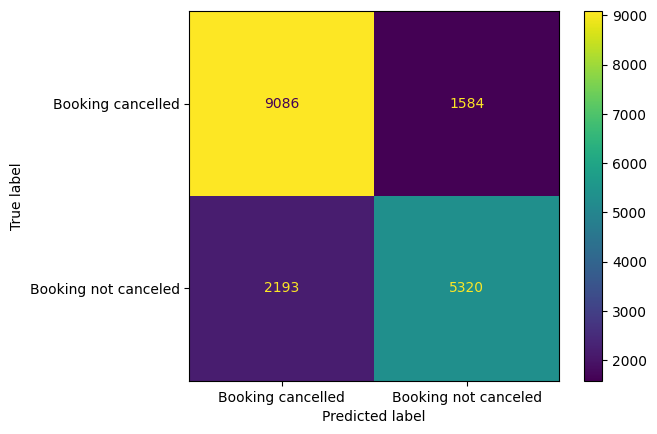

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    logistic, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Booking cancelled', 'Booking not canceled'])

In [57]:
predictions = logistic.predict(X_test_scaled)
df_with_predictions = pd.concat([X_test, y_test], axis='columns')
df_with_predictions = pd.concat([df_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=df_with_predictions.index)], axis=1)

In [58]:
misclassified_df = df_with_predictions[df_with_predictions.is_canceled != df_with_predictions.Prediction]

In [59]:
misclassified_df

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stay_nights_sum,adults,children,babies,is_repeated_guest,previous_cancellations,...,country_ESP,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_SWE,country_USA,is_canceled,Prediction
26382,255,2016,10,16,7,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
58264,20,2017,1,13,3,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
110600,207,2017,8,12,10,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59602,28,2017,2,26,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
90622,8,2016,9,15,1,3,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296,18,2016,3,22,1,2,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
33744,0,2017,6,15,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
105806,82,2017,6,4,7,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4076,33,2016,3,1,8,2,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


Es lassen sich kaum Unterschiede zwischen den Grunddaten und den missklafizierten Daten. Was jedoch auffällt ist, dass das Modell öfter eine Buchung als cancellation predictet. Zudem wurden keine Fehlzuordnungen getroffen, wenn der Gast die den deposit type non refund gewählt hat.  

<ipython-input-60-264e689d0138>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell


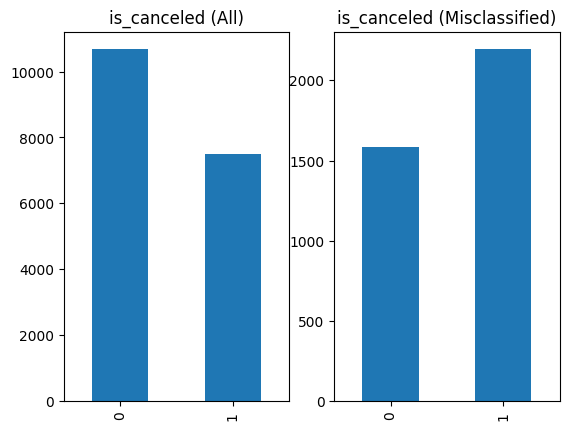

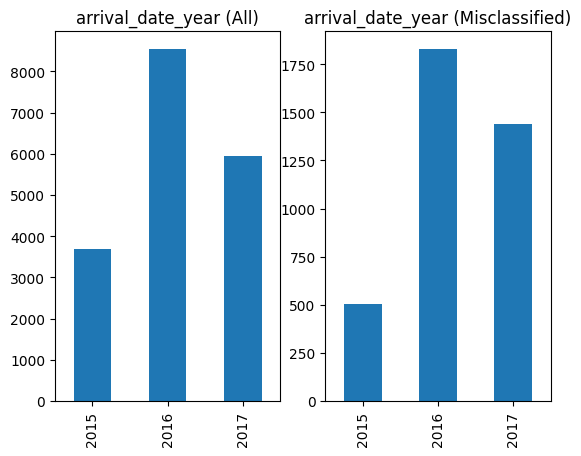

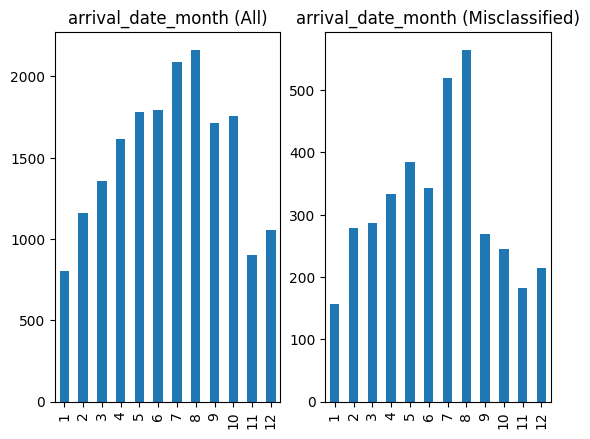

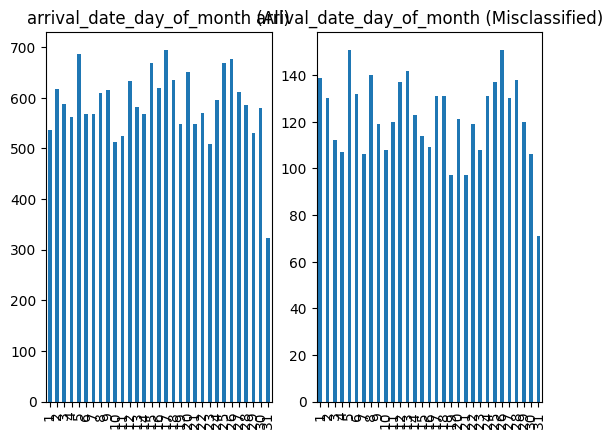

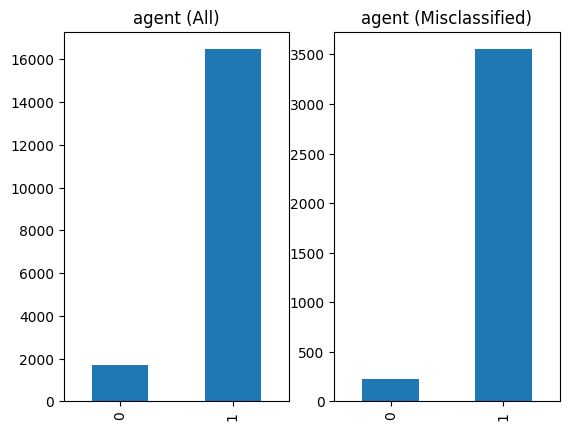

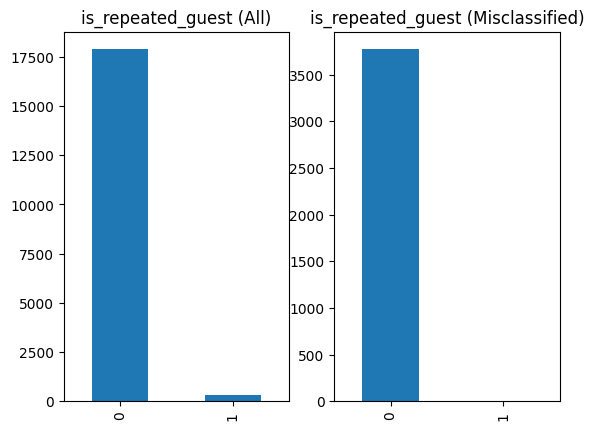

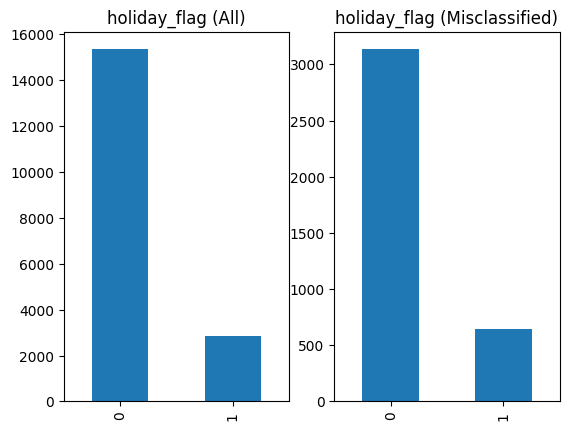

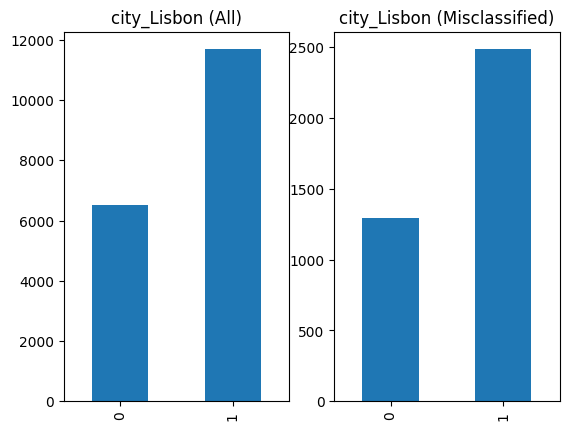

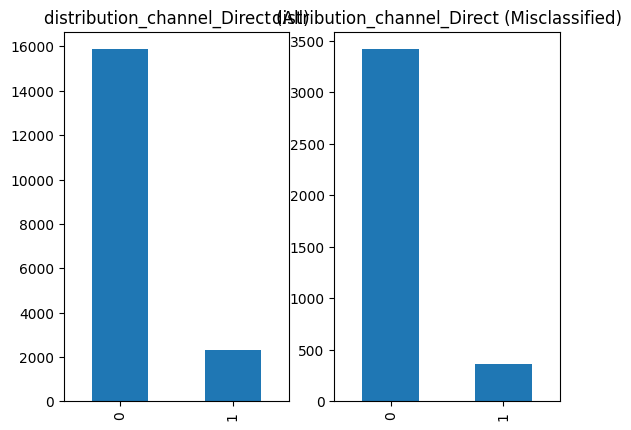

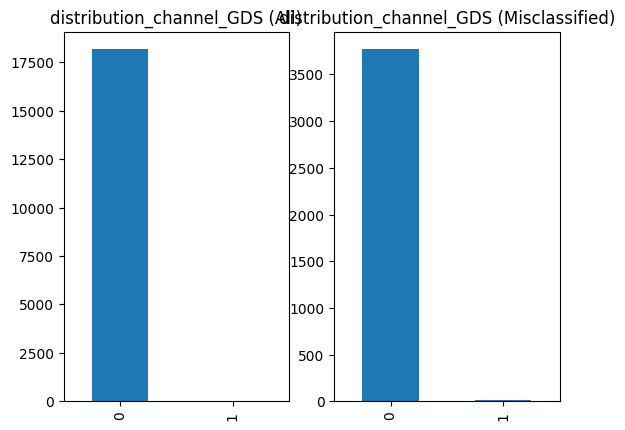

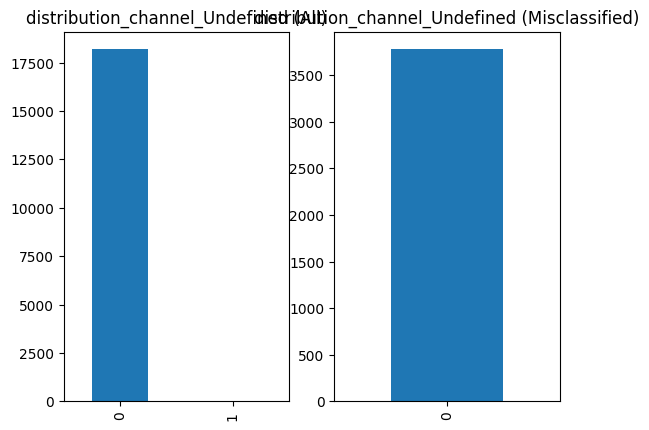

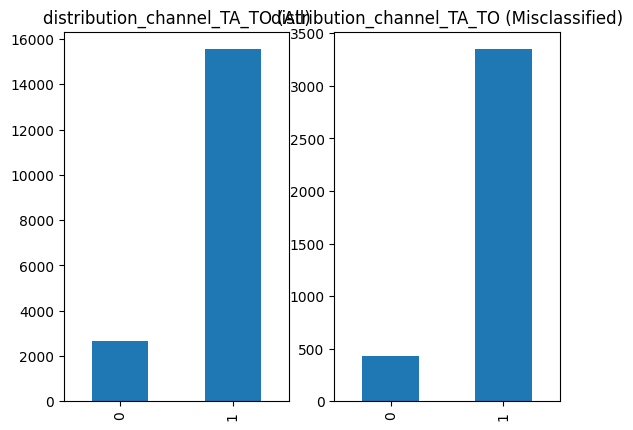

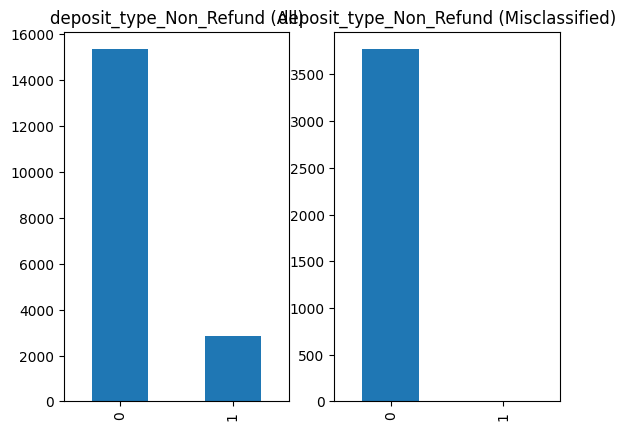

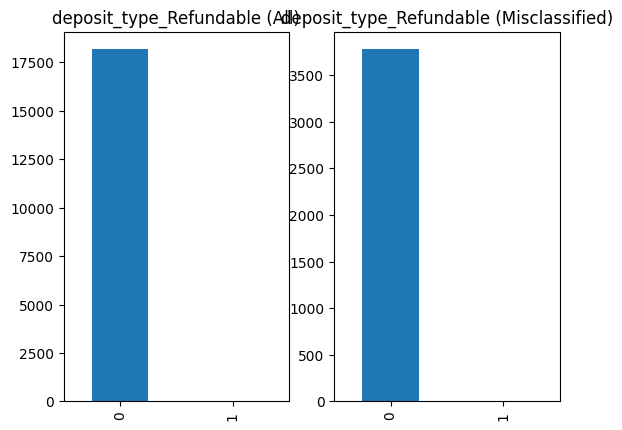

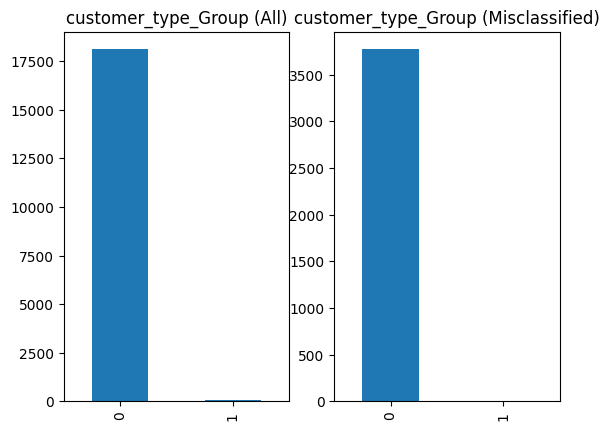

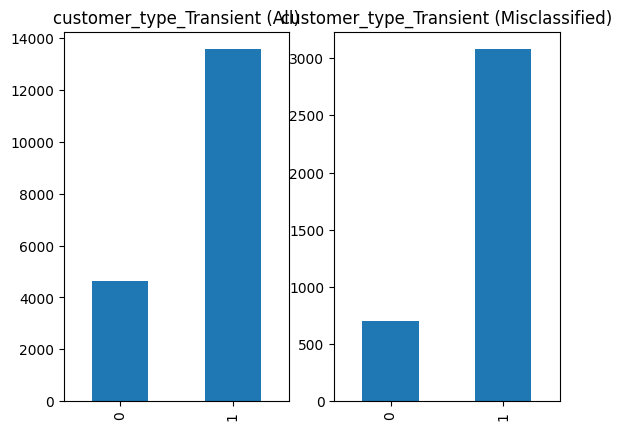

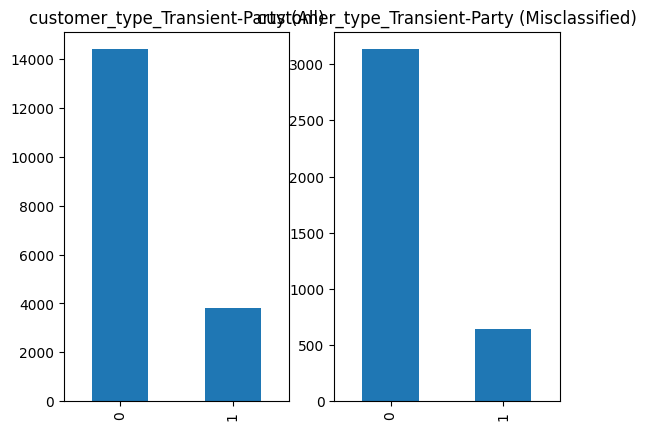

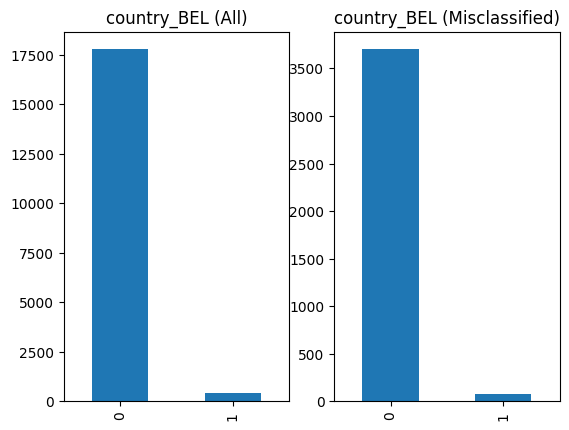

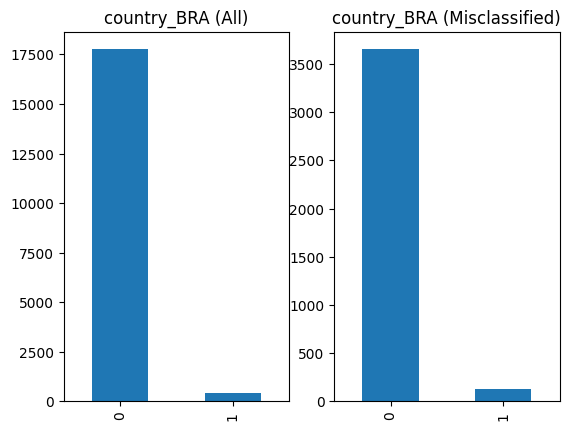

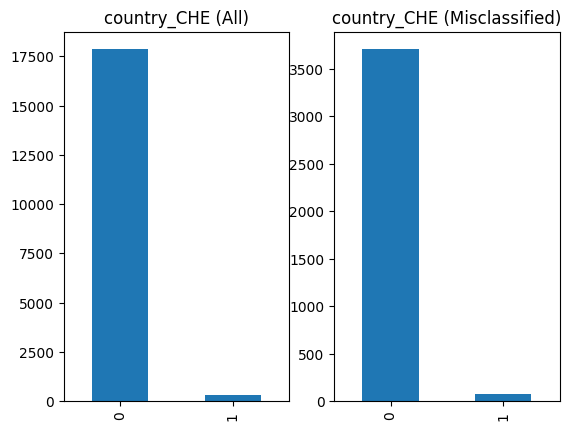

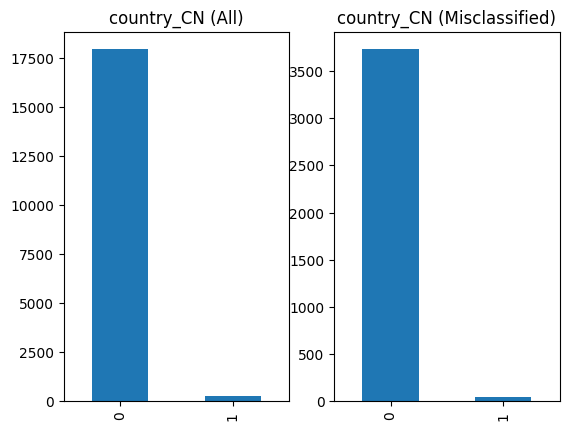

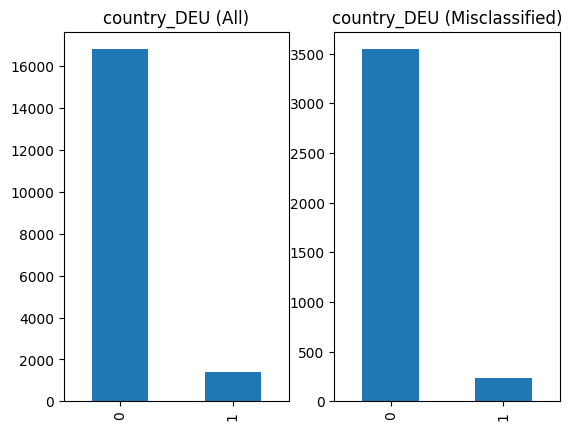

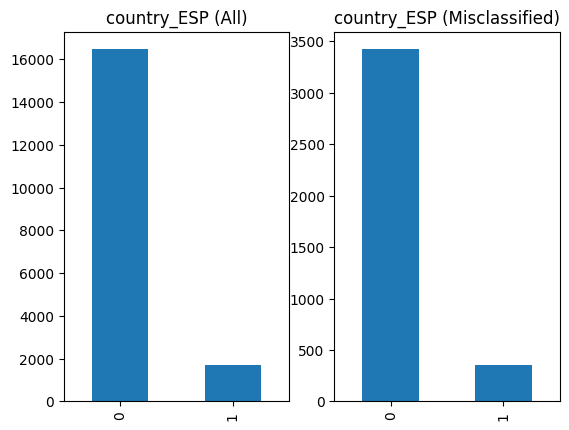

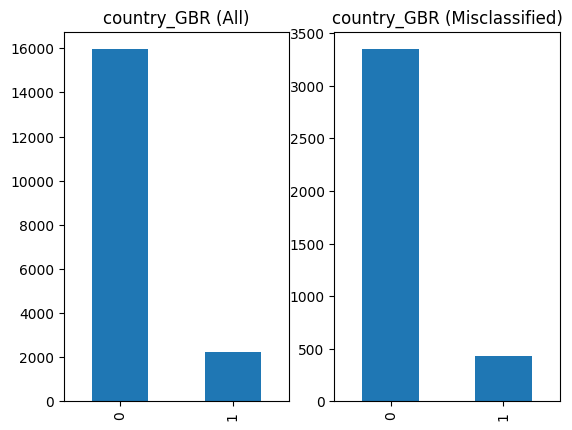

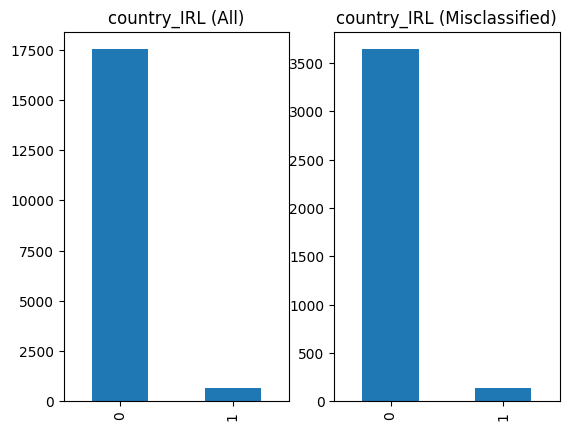

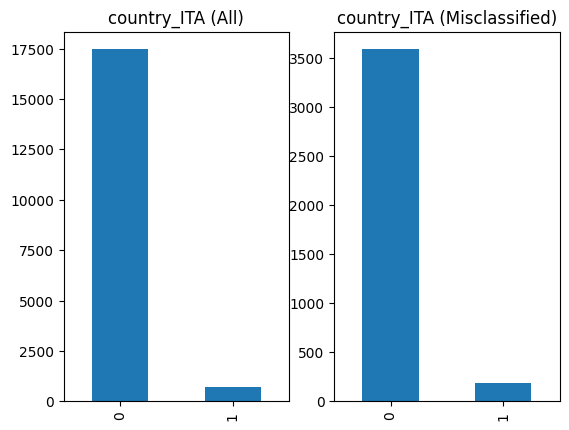

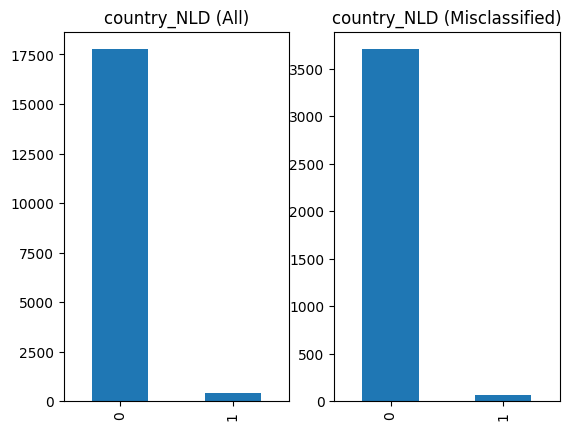

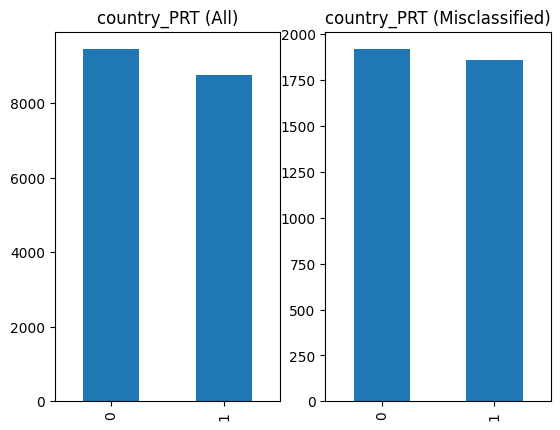

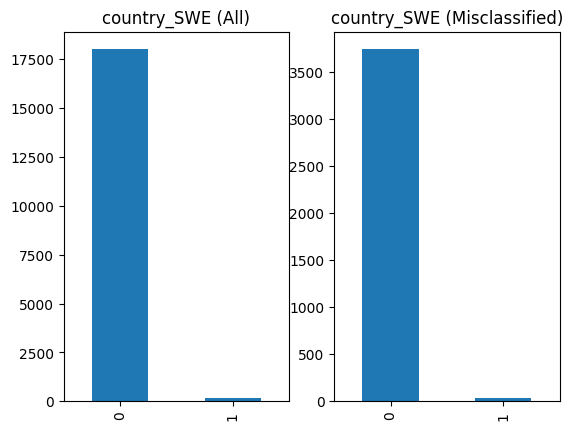

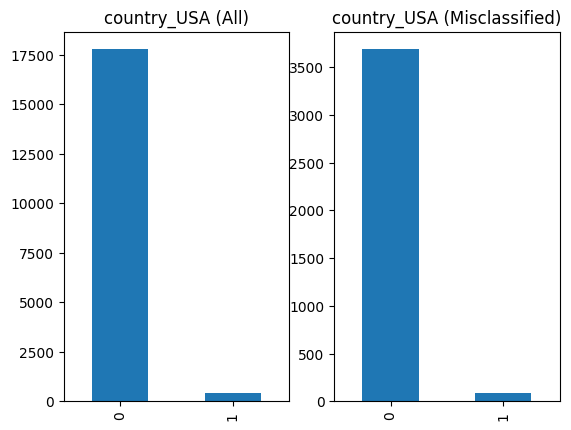

In [60]:
for column in encoded_columns:
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell
  df_with_predictions[column].value_counts(sort=False).sort_index().plot(kind='bar', title=f'{column} (All)', ax=ax1)
  misclassified_df[column].value_counts(sort=False).sort_index().plot(kind='bar', title=f'{column} (Misclassified)', ax=ax2)

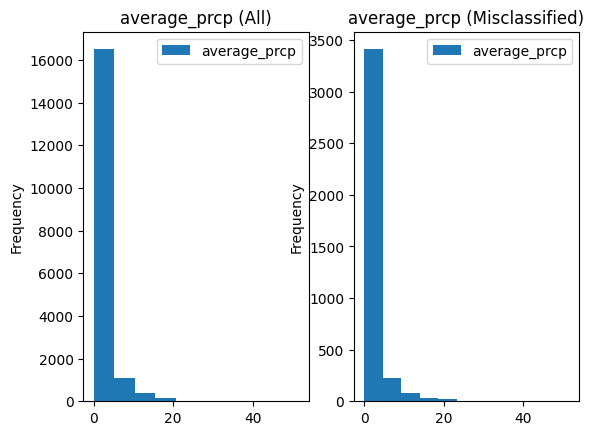

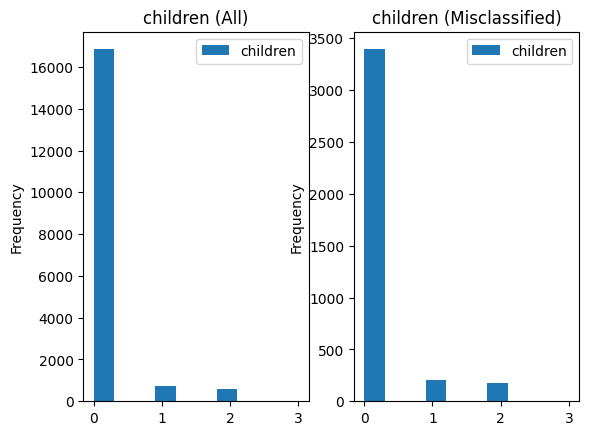

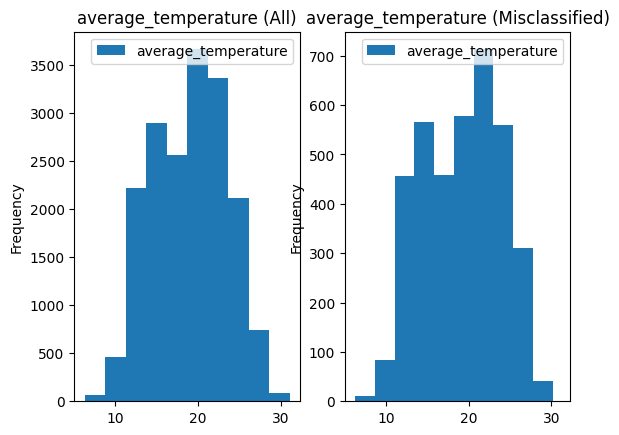

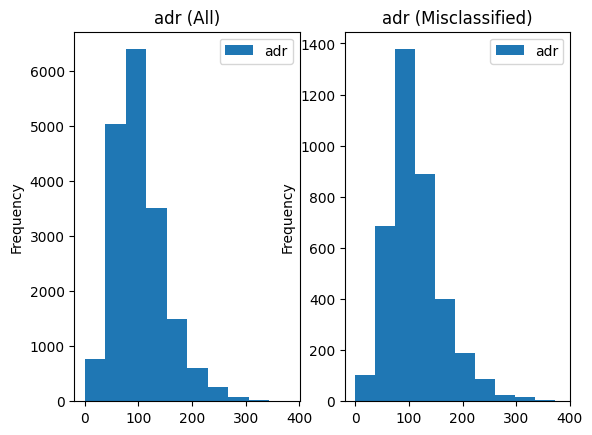

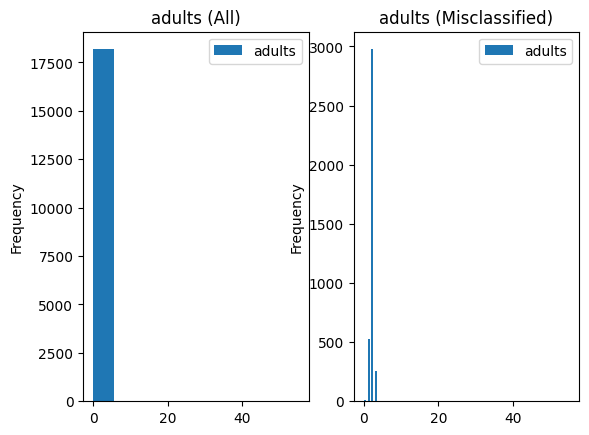

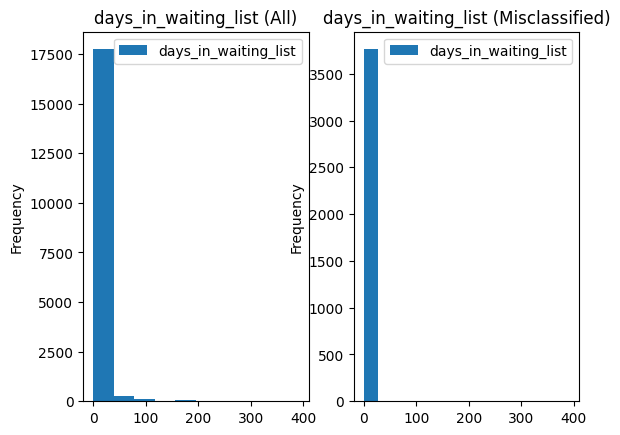

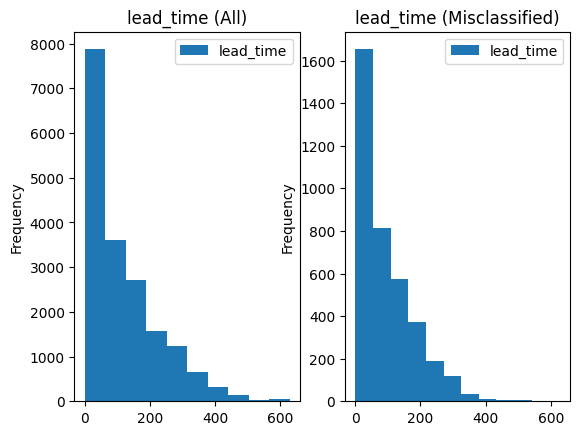

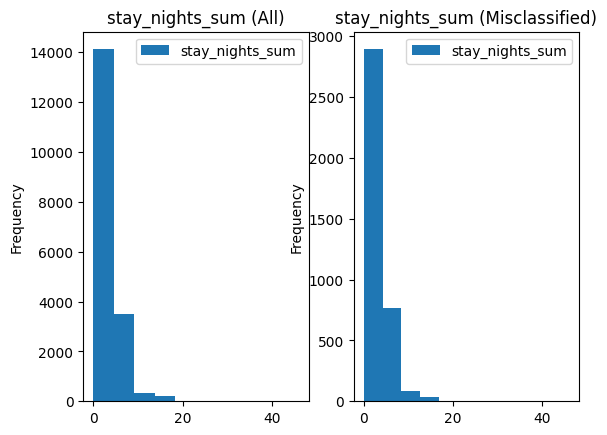

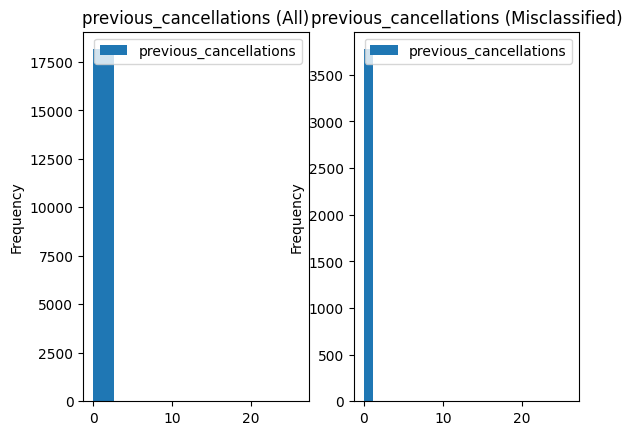

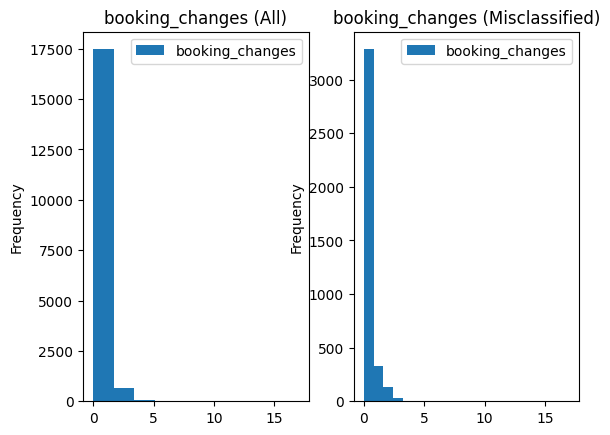

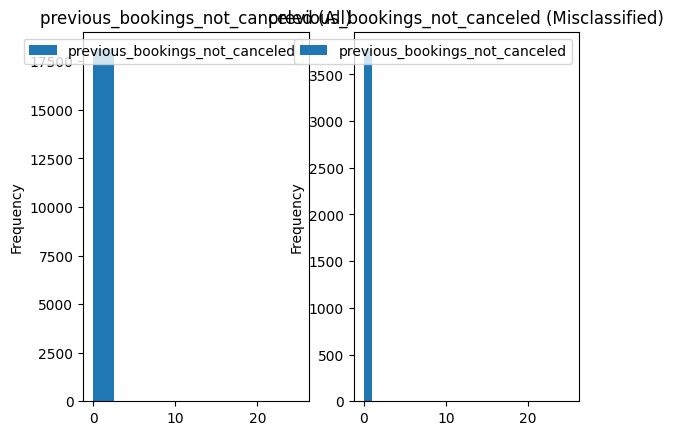

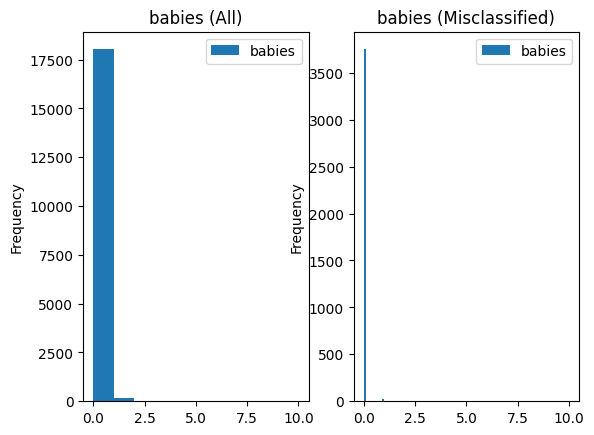

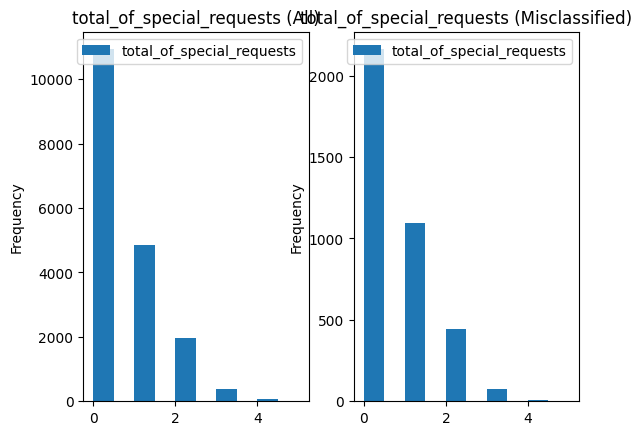

In [61]:
for column in numerical_columns:
  fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
  df_with_predictions.plot(kind='hist', y=column, title=f'{column} (All)', ax=ax1)
  misclassified_df.plot(kind='hist', y=column, title=f'{column} (Misclassified)', ax=ax2)

Im folgenden wird die ROC-AUC-Kurve ausgegeben, welche ein  Maß dafür ist, wie gut ein Klassifikationsmodell in der Lage ist, zwischen verschiedenen Klassen zu unterscheiden. Die x-Achse der Kurve repräsentiert den False Positive Rate (FPR), während die y-Achse den True Positive Rate (TPR) darstellt. Die Fläche unter der ROC-Kurve (AUC) gibt an, wie gut das Modell insgesamt ist. Eine AUC von 1 bedeutet eine perfekte Leistung, während eine AUC von 0,5 darauf hindeutet, dass das Modell nicht besser ist als zufälliges Raten.

Da bei diesem Modell eine score von 0,78 erreicht wird sehen wir dass das Modell solide performt. Es ist deutlich besser als würde man zufällig zuweisen, aber es ist auch noch nicht perfekt (nahe 1)

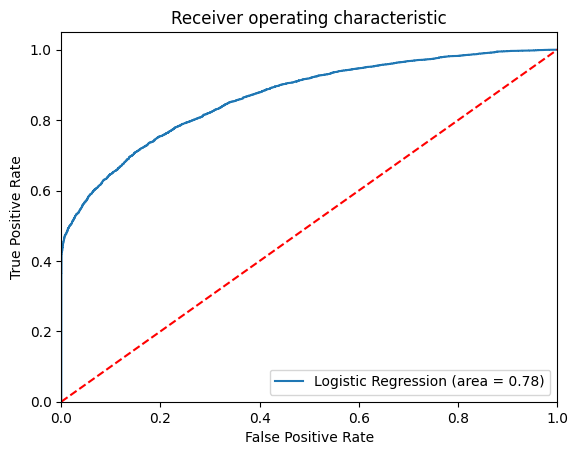

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logistic_roc_auc = roc_auc_score(y_test, logistic.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Feature Importance und Variablen-Reduktion

Anschließend weden mit der recursive feature elimination analysiert, welche Features die wichtigsten in dem Modell waren. Es teilen sich einige Features den ersten Rang. Interessanter hier sind die nicht so wichtigen features, welche anschließend gelöscht werden, um das Modell noch einmal mit reduzierter Komplexität, aber ähnlicher inhaltlicher Korrektheit, durchzuführen.

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=logistic)#, n_features_to_select=10)

rfe.fit(X_scaled_smote, y_scaled_smote)


selected_features = pd.DataFrame({'Feature': X_scaled_smote.columns, 'Selected': rfe.support_, 'Ranking': rfe.ranking_})
print(selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

                           Feature  Selected  Ranking
0                        lead_time      True        1
1                arrival_date_year      True        1
2               arrival_date_month      True        1
3        arrival_date_day_of_month     False       17
4                  stay_nights_sum      True        1
5                           adults      True        1
6                         children     False        8
7                           babies     False       19
8                is_repeated_guest      True        1
9           previous_cancellations      True        1
10  previous_bookings_not_canceled      True        1
11                 booking_changes      True        1
12                           agent     False       11
13            days_in_waiting_list     False        9
14                             adr      True        1
15       total_of_special_requests      True        1
16             average_temperature      True        1
17                    averag

In [ ]:
ranking = pd.DataFrame({'Feature': X_scaled_smote.columns, 'Ranking': rfe.ranking_})
ranking = ranking.sort_values('Ranking')
print(ranking)

                           Feature  Ranking
0                        lead_time        1
39                     country_PRT        1
37                     country_ITA        1
34                     country_ESP        1
33                     country_DEU        1
30                     country_BRA        1
27         customer_type_Transient        1
24         deposit_type_Non_Refund        1
19                     city_Lisbon        1
16             average_temperature        1
15       total_of_special_requests        1
14                             adr        1
20     distribution_channel_Direct        1
11                 booking_changes        1
10  previous_bookings_not_canceled        1
9           previous_cancellations        1
1                arrival_date_year        1
8                is_repeated_guest        1
2               arrival_date_month        1
4                  stay_nights_sum        1
5                           adults        1
28   customer_type_Transient-Par

Bei der Berechnung der feature importance sehen wir dass der mit Abstand wichtigste Faktor ist, ob bereits eine frühere cancellation vorlag. Die beiden folgenden, auch noch hoch relevanten Features sind der deposit type (in diesem Falle, wenn es keine Storno Möglichkeit gibt) und das Herkunftsland des Buchenden wenn dieser aus Portugal stammt.

In [63]:
feature_importance = abs(logistic.coef_[0])

importance_df = pd.DataFrame({'Feature': X_scaled_smote.columns, 'Importance': feature_importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                           Feature  Importance
9           previous_cancellations    2.979483
24         deposit_type_Non_Refund    1.637498
39                     country_PRT    0.954119
10  previous_bookings_not_canceled    0.772349
27         customer_type_Transient    0.525328
0                        lead_time    0.492740
20     distribution_channel_Direct    0.482376
15       total_of_special_requests    0.470954
1                arrival_date_year    0.305114
11                 booking_changes    0.260881
34                     country_ESP    0.242621
14                             adr    0.231795
37                     country_ITA    0.220247
19                     city_Lisbon    0.178969
30                     country_BRA    0.171321
4                  stay_nights_sum    0.164147
2               arrival_date_month    0.127238
22      distribution_channel_TA_TO    0.108884
16             average_temperature    0.101240
36                     country_IRL    0.101194
41           

Folgend werden alle features gedroppt, welche einen Wert unter 0,1 besitzen und unter einer neuen Variable gespeichert, welche erneut durch den gesamten Modelltraining-Prozess geführt wird.

In [64]:
less_features_df = maindf_c.drop(columns=['average_prcp', 'babies', 'agent', 'days_in_waiting_list', 'children', 'holiday_flag', 'stay_nights_sum', 'adults', 'average_temperature', 'customer_type_Group', 'distribution_channel_Undefined', 'country_CN', 'deposit_type_Refundable', 'country_SWE', 'country_NLD', 'country_BEL', 'distribution_channel_GDS', 'country_DEU', 'country_CHE', 'customer_type_Transient-Party', 'country_GBR', 'country_USA'])

In [65]:
new_X = less_features_df.drop(columns='is_canceled')
new_y = less_features_df.is_canceled

In [66]:
new_X_scaled = less_features_df.drop(columns='is_canceled')
new_y_scaled = less_features_df.is_canceled

In [67]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42, stratify = new_y, shuffle = True)
new_X_train_scaled, new_X_test_scaled, new_y_train_scaled, new_y_test_scaled = train_test_split(new_X_scaled, new_y_scaled, test_size=0.2, random_state=42, stratify = new_y_scaled, shuffle = True)

In [68]:
new_smote = SMOTE(random_state=42)
new_X_smote, new_y_smote = smote.fit_resample(new_X_train,new_y_train)
new_X_scaled_smote, new_y_scaled_smote = smote.fit_resample(new_X_train_scaled,new_y_train_scaled)

In [69]:
def new_evaluate(clf, new_X_test, new_y_true):
  new_y_pred = clf.predict(new_X_test)
  print(classification_report(new_y_true, new_y_pred))

In [70]:
new_logistic = LogisticRegression(random_state=56)

In [71]:
new_logistic.fit(new_X_scaled_smote, new_y_scaled_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=56)

Wir sehen dass das reduzieren vermeindlich weniger wichtiger Features aus dem Datensatz die Accuracy leicht verschlechtert hat. Auch die f1-scores sind negativ beeinflusst worden. Es wird sich somit dagegen entschieden die features zu droppen.

In [72]:
new_evaluate(new_logistic, new_X_test_scaled, new_y_test_scaled)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     10670
           1       0.73      0.72      0.72      7513

    accuracy                           0.77     18183
   macro avg       0.77      0.77      0.77     18183
weighted avg       0.77      0.77      0.77     18183



In [73]:
new_logistic.score(new_X_test_scaled, new_y_test_scaled)

0.7734697244679096

### Hyperparametertuning

Im folgenden werden die Hyperparameter der logistischen Regression analysiert, um die bestmöglichen Einstellungen für das Modell herauszufinden.

In [74]:
from scipy.stats import loguniform

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

Wir sehen dass die optimalen Einstellungen für das Modell folgende sind: 'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'.

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_scaled, y_scaled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

y_pred = best_model.predict(X_scaled)
print("Classification Report:")
print(classification_report(y_scaled, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.84     53349
           1       0.83      0.62      0.71     37565

    accuracy                           0.79     90914
   macro avg       0.80      0.77      0.77     90914
weighted avg       0.80      0.79      0.79     90914



In [76]:
def hyper_evaluate(clf, X_test, y_true):
  hyper_y_pred = clf.predict(X_test)
  print(classification_report(y_true, hyper_y_pred))

Mit dem Parameter l2 wird die sogenannte L2-Regulierung angewandt und verringert so die Gefahr vor Overfitting stark, da die Komplexität des Modells reduziert wird und somit weniger anfällig für overfitting ist. Das Modell wird bestraft wenn es große Koeffizienten verwendet. Die Koeffizienten werden während des Trainingsprozesses kleiner gehalten.

In [77]:
hyper_logistic = LogisticRegression(random_state=56, C=0.1, penalty='l2', solver='liblinear')

In [78]:
hyper_logistic.fit(X_scaled_smote, y_scaled_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, random_state=56, solver='liblinear')

wir sehen dass die Accuracy auch nach dem Parametertuning nicht besser ist als nach dem ursprünglichen Modelltraining. Es weicht aber auch nur minimal ab. Es wird sich für bei der logistischen Regression für die erste Durchführung entschieden, da dort durch die Bank die besten Ergebnisse entstanden sind.  

In [79]:
hyper_evaluate(hyper_logistic, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     10670
           1       0.77      0.71      0.74      7513

    accuracy                           0.79     18183
   macro avg       0.79      0.78      0.78     18183
weighted avg       0.79      0.79      0.79     18183



In [80]:
hyper_logistic.score(X_test_scaled, y_test_scaled)

0.7921135126216796

# **k-NN (K-Nearest-Neighbor)**


> Der K-Nearest-Neighbor-Algorithmus kann sowohl für Regressions- als auch für Klassifikationsprobleme genutzt werden. In der Regel wird er jedoch als Klassifikationsalgorithmus verwendet.

> Bei diesem Algorithmus wird das Konzept der Nähe genutzt, um einzelne Datenpunkte zu Klassifizieren oder Gruppierungen dieser vorhersagen zu können.
Als Klassifikationsalgorithmus eingesetzt, wird davon ausgegangen, dass vergleichbare Datenpunkte dazu neigen, in der Nähe voneinander gefunden zu werden, also ähnliche Ausgabewerte haben. Dazu muss ein k-Wert festgelegt werden, der definiert, wie viele Nachbarn mit einem neuen Punkt verglichen werden sollen. Daraus soll am Ende ein Modell trainiert werden, dass neue Datenpunkte selbstständig den Klassen zuordnen kann.


>Um den kNN-Algorithmus verwenden zu können, wird zuerst die Klasse '`KNeighborClassifier`' aus dem Modul '`sklearn.neighbors`' importiert. Als Default ist n_neighbors = 5 festgelegt.

> Anschließend wurde das Objekt '`knn`' von '`KNeighborClassifier`' erstellt, dass dann für die Klassifikationen der Daten verwendet werden soll.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

>Mit der Funktion '`knn.fit`' wird das Objekt '`knn`' auf die trainierten und skalierten Variablen '`X_train_scaled`' und die Zielvariable (hier '`is_canceld`') '`Y_train_scaled`' gefittet. Der Algorithmus wird also auf die Daten trainiert, mit denen hinterher ein Modell erstellt werden kann, das die Beziehungen zwischen Eingabe- und Zielvariablen lernt.

In [ ]:
knn.fit(X_train_scaled, y_train_scaled)

> Die Funktion '`knn.predict`' wird dazu genutzt,  Vorhersagen zu den skalierten Daten treffen zu können. Das trainierte Modell wird nun also auf die Daten angewendet. Zudem werden die Ergebnisse der Variable '`y_pred`' zugewiesen.

> Ebenfalls sollte die Accuracy ausgegeben werden. Diese beträgt ~0.8321, also 83,21%. Dies stellt bereits eine gute Genauigkeit des trainierten Modells dar.

In [ ]:
y_pred = knn.predict(X_test_scaled)


from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test_scaled, y_pred))

> Die '`evaluate`' Funktion zeigt ebenfalls noch einmal die Güte des erlernten kNN-Modells an. Hier werden außerdem noch die Präzision und der F1-Score des Modells ausgegeben. Da ein F1-Score von 1 angestrebt werden sollte, zeigt auch dies, dass ein gutes Modell erstellt wurde.

In [ ]:
evaluate(knn, X_test_scaled, y_test_scaled)

> In der Confusion-Martix ist nun zu sehen, wie häufig die Stornierung einer Buchung vorhergesagt wurde und wie häufig diese auch tatsächlich eingetreten ist. Gleiches gilt für Buchungen, die nicht storniert wurden.

> Laut Matrix wurden 10.000 Werte korrekt als Stornierung vorhergesagt. In 1.874 Fällen, wurde fälschlicherweise eine Stornierung prognostiziert.
Gleiches Prinzip gilt für das Label '`Booking not canceld`'. Hier wurden 5.868 Fälle richtig und 1.363 Fälle falsch eingeordnet.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    knn, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Booking cancelled', 'Booking not canceled'])

## Hyperparametertuning

> Um die Performance des Ergebnisses noch verbessern zu können soll ein Hyperparameter Tuning durchgeführt werden. Ziel ist es die besten Parameter zu bestimmen, um das Modell präziser machen zu können.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

ht = RandomizedSearchCV(knn, param_grid, random_state=42, n_iter=10)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(X_train_scaled, y_train_scaled)

In [ ]:
# find the best score
g_res.best_score_

In [ ]:
# get the hyperparameters with the best score
ht_params=g_res.best_params_
ht_params

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train_scaled, y_train_scaled)

In [ ]:
# get a prediction
y_hat = knn.predict(X_train_scaled)
y_knn = knn.predict(X_test_scaled)

In [ ]:
evaluate(g_res, X_test_scaled, y_test_scaled)

# **Support Vector Machines**



> Support Vector Machines sind im Machine Learning weit verbreitete Algorithmen, insbesondere für Klassifikationsaufgaben. Dabei kann über den Parameter 'kernel' bestimmt werden, durch welche Funktionsform die Klassen gebildet werden (linear, rbf, polynomial). Für große Datenmengen, wie sie in unserem Fall vorliegen, eignen sich die Standard-SVCs leider nicht, wir benötigen die schnellere Implementierung, den LinearSVC. Dieser Classifier akzeptiert allerdings den Parameter 'kernel' nicht bzw. der Parameter muss nicht definiert werden.

> Wir importieren den LinearSVC aus dem sklearn.svm-package, trainieren das Modell und evaluieren das gefittete Modell.

In [ ]:
# for LinearSVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification

# for predicting labels
from sklearn.metrics import accuracy_score, recall_score, precision_score

#for Hyperparameter Tuning
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

#for Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier



> Nach Bestimmung des Classifier-Modells `LinearSVC`, dem `random_state=42` und dem Toleranzwert `tol=1e-5`, der definiert, wann das Training beendet werden soll (wenn die Vorhersagen weniger oder gleich dem Toleranzwert von den tatsächlichen Zielwerten abweichen). Nach Definition der Parameter trainieren wir das Modell auf die skalierten Trainingsdaten.


In [ ]:
X, y = make_classification(n_features=4, random_state=42)
svc_clf = LinearSVC(random_state=42, tol=1e-5)

svc = svc_clf.fit(X_train_scaled, y_train_scaled)



> Wir lassen uns außerdem die y-Werte auf Basis der skalierten X-Testdaten mithilfe des soeben trainierten Modells vorhersagen. Dafür nutzen wir die Funktion `predict()`. Für die darauffolgende Evaluation mit der oben definierten `evaluate`-Funktion müssen wir außerdem das predictete y-Werte-Array anpassen. Über `reshape` reduzieren wir die y-Werte auf ein eindimensionales Array, das wir so auch in die `evaluate`-Funktion übergeben können.



In [ ]:
y_svc_predict = svc_clf.predict(X_test_scaled)
y_svc_predict = y_svc_predict.reshape(-1,1)



> Wir sehen, dass das Modell mit einer Acuracy von 0.79 und auch einem f1-score in diesem Bereich relativ akkurat die y-Ergebnisse des Test-Datensatzes ausgibt. Es könnte sich lohnen, hier durch Hyperparameter Tuning das Modell noch durch die Auswahl der besten Hyperparameter zu verbessern.



In [ ]:
evaluate(svc, X_test_scaled,y_test_scaled)



> Über die Confusion Matrix können wir nun auch darstellen, wie häufig bestimmte Werte predictet wurden und stellen diese den tatsächlich eingetretenen Fällen gegnüber.



> rund 9900 Werte wurden korrekt als 'is_canceled' predictet, 831 wurden als 'canceled' predictet, obwohl keine Cancellation vorlag, 2900 wurden gecancelt, aber nicht als solche predictet und rund 4600 Fälle wurden nicht gecancelt und korrekterweise auch nicht als solche vorhergesagt.





In [ ]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test_scaled, y_svc_predict))



> Für eine noch übresichtlichere Darstellung plotten wir die Ergebnisse der Confusion Matrix.



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    svc, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Not canceled', 'Canceled'])

## **Hyperparameter Tuning**

> Wir versuchen nun durch definieren verschiedener Hyperparameter die Accuracy unseres Modells noch zu verbessern. Durch Recherche und Ausprobieren verändern wir nach und nach die Parameter, um das bestmögliche Ergebnis zu erreichen.
Die ausgewählten Parameter speichern wir jeweils in einem Grid, das wir dann in die RandomizedSearchCV übergeben, die zufällig verschiedene Kombinationen der Parameter durchtestet und gleichzeitig cross-validation durchführt.

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': [None, 'balanced'],
    'dual': [True, False],
    'fit_intercept': [True, False],
    'intercept_scaling': loguniform(0.1, 10),
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [100, 500, 1000],
    'penalty': ['l1', 'l2'],
    'tol': loguniform(0.0001, 0.1),
    'verbose': [0, 1]
}

> Wir übergeben nun den Classifier, das definierte Grid mit den spezifizierten Hyperparametern, dem `random_state 42` und der Anzahl an Verbesserungsinterationen der RandomizedSearch mit kombinierter cross-validation.
> Danach kann das Modell an die skalierten Trainingsdaten angepasst werden.

In [ ]:
ht_svc = RandomizedSearchCV(svc_clf, param_grid, random_state=42, n_iter=10)

In [ ]:
ht_svc.fit(X_train_scaled, y_train_scaled)

> Nach Beenden des Hyperparameter Tunings können wir die besten Hyperparamter ausgeben und einsehen.

In [ ]:
ht_svc.best_params_

> Wir evaluieren außerdem unser Modell. Durch Hyperparameter Tuning hat sich die Accuracy um % verbessert.

In [ ]:
evaluate(ht_svc, X_test_scaled, y_test_scaled)

# Decision Tree

> Im Folgenden wollen wir eine Classification mithilfe eines Decision Trees durchführen. Wir beginnen, indem wir alle für die Analyse notwendigen Funktionen einlesen.

In [ ]:
# importing relevant functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

> Wir definieren unser Classification-Methode als DecisionTreeClassifier.

In [ ]:
# defining the classification model
tree = DecisionTreeClassifier(random_state=42)

> Im nächsten Schritt trainieren wir das Modell auf den Trainingsdaten.

In [ ]:
# training the model
tree.fit(X_train_scaled, y_train_scaled)

DecisionTreeClassifier(random_state=42)

> Wir lassen uns die Targetvariable auf Basis der Testdaten vorhersagen.

In [ ]:
# predicting the target for the test data
y_test_pred = tree.predict(X_test_scaled)

> Evaluieren wir zuerst die Performance des Models auf Basis der Trainingsdaten erhalten wir eine Accuracy von 0.99.

> Daraus schließen wir, dass das Modell bei den Trainingsdaten außergewöhnlich gut funktioniert und die dort vorhandenen Muster sehr gut anpassen oder speichern kann. Wir sprechen hier von Overfitting.

> Um diese Annahme zu bestätigen, lassen wir uns im zweiten Schritt die Performance des Models auf Basis der Testdaten ausgeben.

In [ ]:
# evaluating the performance of the train data
evaluate(tree, X_train_scaled, y_train_scaled)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     42679
           1       1.00      0.99      0.99     30052

    accuracy                           0.99     72731
   macro avg       1.00      0.99      0.99     72731
weighted avg       0.99      0.99      0.99     72731



> Hier erhalten wir eine Accuracy von 0.84. Die Leistung des Modells ist bei den Testdaten also deutlich geringer im Vergleich zu den Trainingsdaten. Diese Diskrepanz deutet darauf hin, dass das Modell nicht gut auf neue Beispiele verallgemeinert und bestätigt unsere Annahme des Overfittings.

In [ ]:
# evaluating the performance of the test data
evaluate(tree, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     10670
           1       0.80      0.81      0.80      7513

    accuracy                           0.84     18183
   macro avg       0.83      0.83      0.83     18183
weighted avg       0.84      0.84      0.84     18183



> Den Accuracy Score von 0.84 sehen wir als vergleichsweise gutes Ergebnis an, werden aber im weiteren Verlauf versuchen, ihn durch Hyperparameter Tuning weiter zu optimieren.

## Hyperparameter Tuning

> Um unser Decision-Tree-Modell zu optimieren, führen wir im nächsten Schritt das Hyperparameter Tuning durch.

> Wir definieren erneut unsere Classification-Methode, allerdings ohne bereits einen 'random_state' vorzugeben.

In [ ]:
# defining the classification model
tree = DecisionTreeClassifier()

### RandomizedSearchCV

> Zu aller erst wollen wir wissen, welche Parameter sich aktuell im Decision Tree Classifier befinden und uns damit für das Hyperparameter Tuning zur erfügung stehen.

In [ ]:
# Explore parameters used by the current decision tree

from pprint import pprint

print('Parameters currently in use:\n')
pprint(tree.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


> Wir erstellen ein Grid, in dem wir für alle relevanten Parameter einen Suchbereich bestimmen.Dieser enthält definierte Optionen, die durchgetestet werden sollen und anhand derer die optimale Parametereinstellung gefunden werden soll.

In [ ]:
from scipy.stats import loguniform

param_grid = {
    'criterion': ['entropy','gini','log_loss'],
    'splitter': ['best','random'],
    'max_depth': [None,3, 5, 7, 9],
    'min_samples_split': [2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [4, 5, 7, 9, 11, 13,'log2','sqrt',None],
    'random_state': [None, 21, 42]
}

> Wir definieren unsere Methode als RandomizedSearchCV.

In [ ]:
# creating a randomized search instance

from sklearn.model_selection import RandomizedSearchCV

ht = RandomizedSearchCV(tree, param_grid, n_iter=10)

In [ ]:
ht.fit(X_train_scaled, y_train_scaled)

ValueError: ignored

In [ ]:
ht.best_params_

{'splitter': 'best',
 'random_state': 42,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 11,
 'max_depth': 9,
 'criterion': 'gini'}

In [ ]:
evaluate(ht, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85     10670
           1       0.82      0.68      0.74      7513

    accuracy                           0.81     18183
   macro avg       0.81      0.79      0.79     18183
weighted avg       0.81      0.81      0.80     18183



> Die Accuracy unseres Models ist nach dem Hyperparameter Tuning etwas niedriger als zuvor.

### GridSearchCV

> Wir versuchen uns an einer Alternative zum RandomizedSearchCV: dem GridSearchCV.

> Dafür passen wir die Parameter in unserem Search Grid an bzw. minimiren ihren Umfang. Grund hierfür ist die hohe Komplexität und lange Laufzeit des Fittings.

In [ ]:
param_grid = {
    'criterion': ['entropy','gini','log_loss'],
    'max_depth': [None,3, 5, 7, 9],
    'min_samples_split': [2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 4, 6],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

ht = GridSearchCV(tree, param_grid, n_jobs=2)

In [ ]:
ht.fit(X_train_scaled, y_train_scaled)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [None, 3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 3, 5, 7]})

In [ ]:
ht.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [ ]:
evaluate(ht, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     10670
           1       0.81      0.81      0.81      7513

    accuracy                           0.84     18183
   macro avg       0.83      0.83      0.83     18183
weighted avg       0.84      0.84      0.84     18183



> Wir erhalten mit GridSearchCV eine Accuracy identisch zu unserem Modell vor dem Hyperparameter Tuning.

## Finaler Decision Tree

In [ ]:
tree = DecisionTreeClassifier(
    splitter='best',
    random_state=42,
    min_samples_split=7,
    min_samples_leaf=4,
    max_features=None,
    max_depth=None,
    criterion='entropy')

In [ ]:
tree.fit(X_train_scaled, y_train_scaled)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=7, random_state=42)

In [ ]:
y_pred = tree.predict(X_test_scaled)

In [ ]:
evaluate(tree, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     10670
           1       0.82      0.78      0.80      7513

    accuracy                           0.84     18183
   macro avg       0.83      0.83      0.83     18183
weighted avg       0.84      0.84      0.84     18183



> Wenn wir uns den Confusion Matrix ausgeben lassen erkennen wir, dass eine sehr ähnliche Anzahl an Fehlern 'False Positive' und 'False Negative' sind. Es besteht demnach nur ein sehr geringer Unterschied zwischen den falschen Vorhersagen einer stornierten und einer nicht-storierten Buchung.

In [ ]:
# printing the confusion matrix
print(confusion_matrix(y_test_scaled, y_pred))

[[9344 1326]
 [1654 5859]]


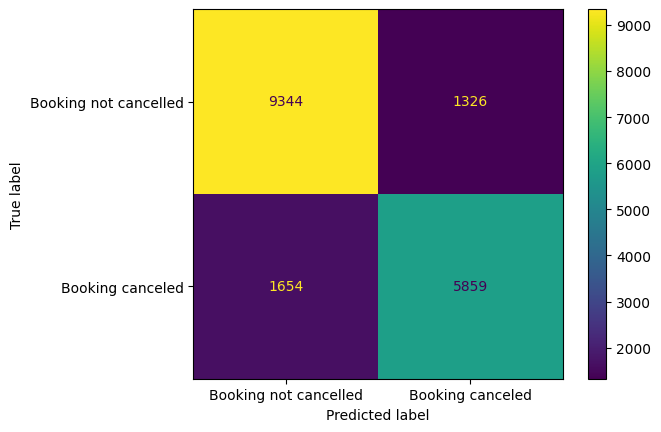

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    tree, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Booking not cancelled', 'Booking canceled'])

> Wir möchten uns den Decision Tree visualisieren lassen, um direkt ablesen zu können, wo das Modell die Schwellenwerte der einzelnen Variablen setzt, die entscheiden, ob eine Buchung storniert wird oder nicht.

> Vorerst werden die erforderlichen Pakete installiert.

> Wir begrenzen die Visualisierung auf eine Breite von 25 Pixeln und eine Höhe von 20 Pixeln.

> Der Baum soll sich außerdem auf maximal 4 abzweigende Ebenen beschränken und mit einer Schriftgröße von 12 angezeigt werden. Die Features sollen analog zu den Variablen und die letztendlichen Klassen analog zu dem Fakt Keine Stornierung/Stornierung betitelt werden.

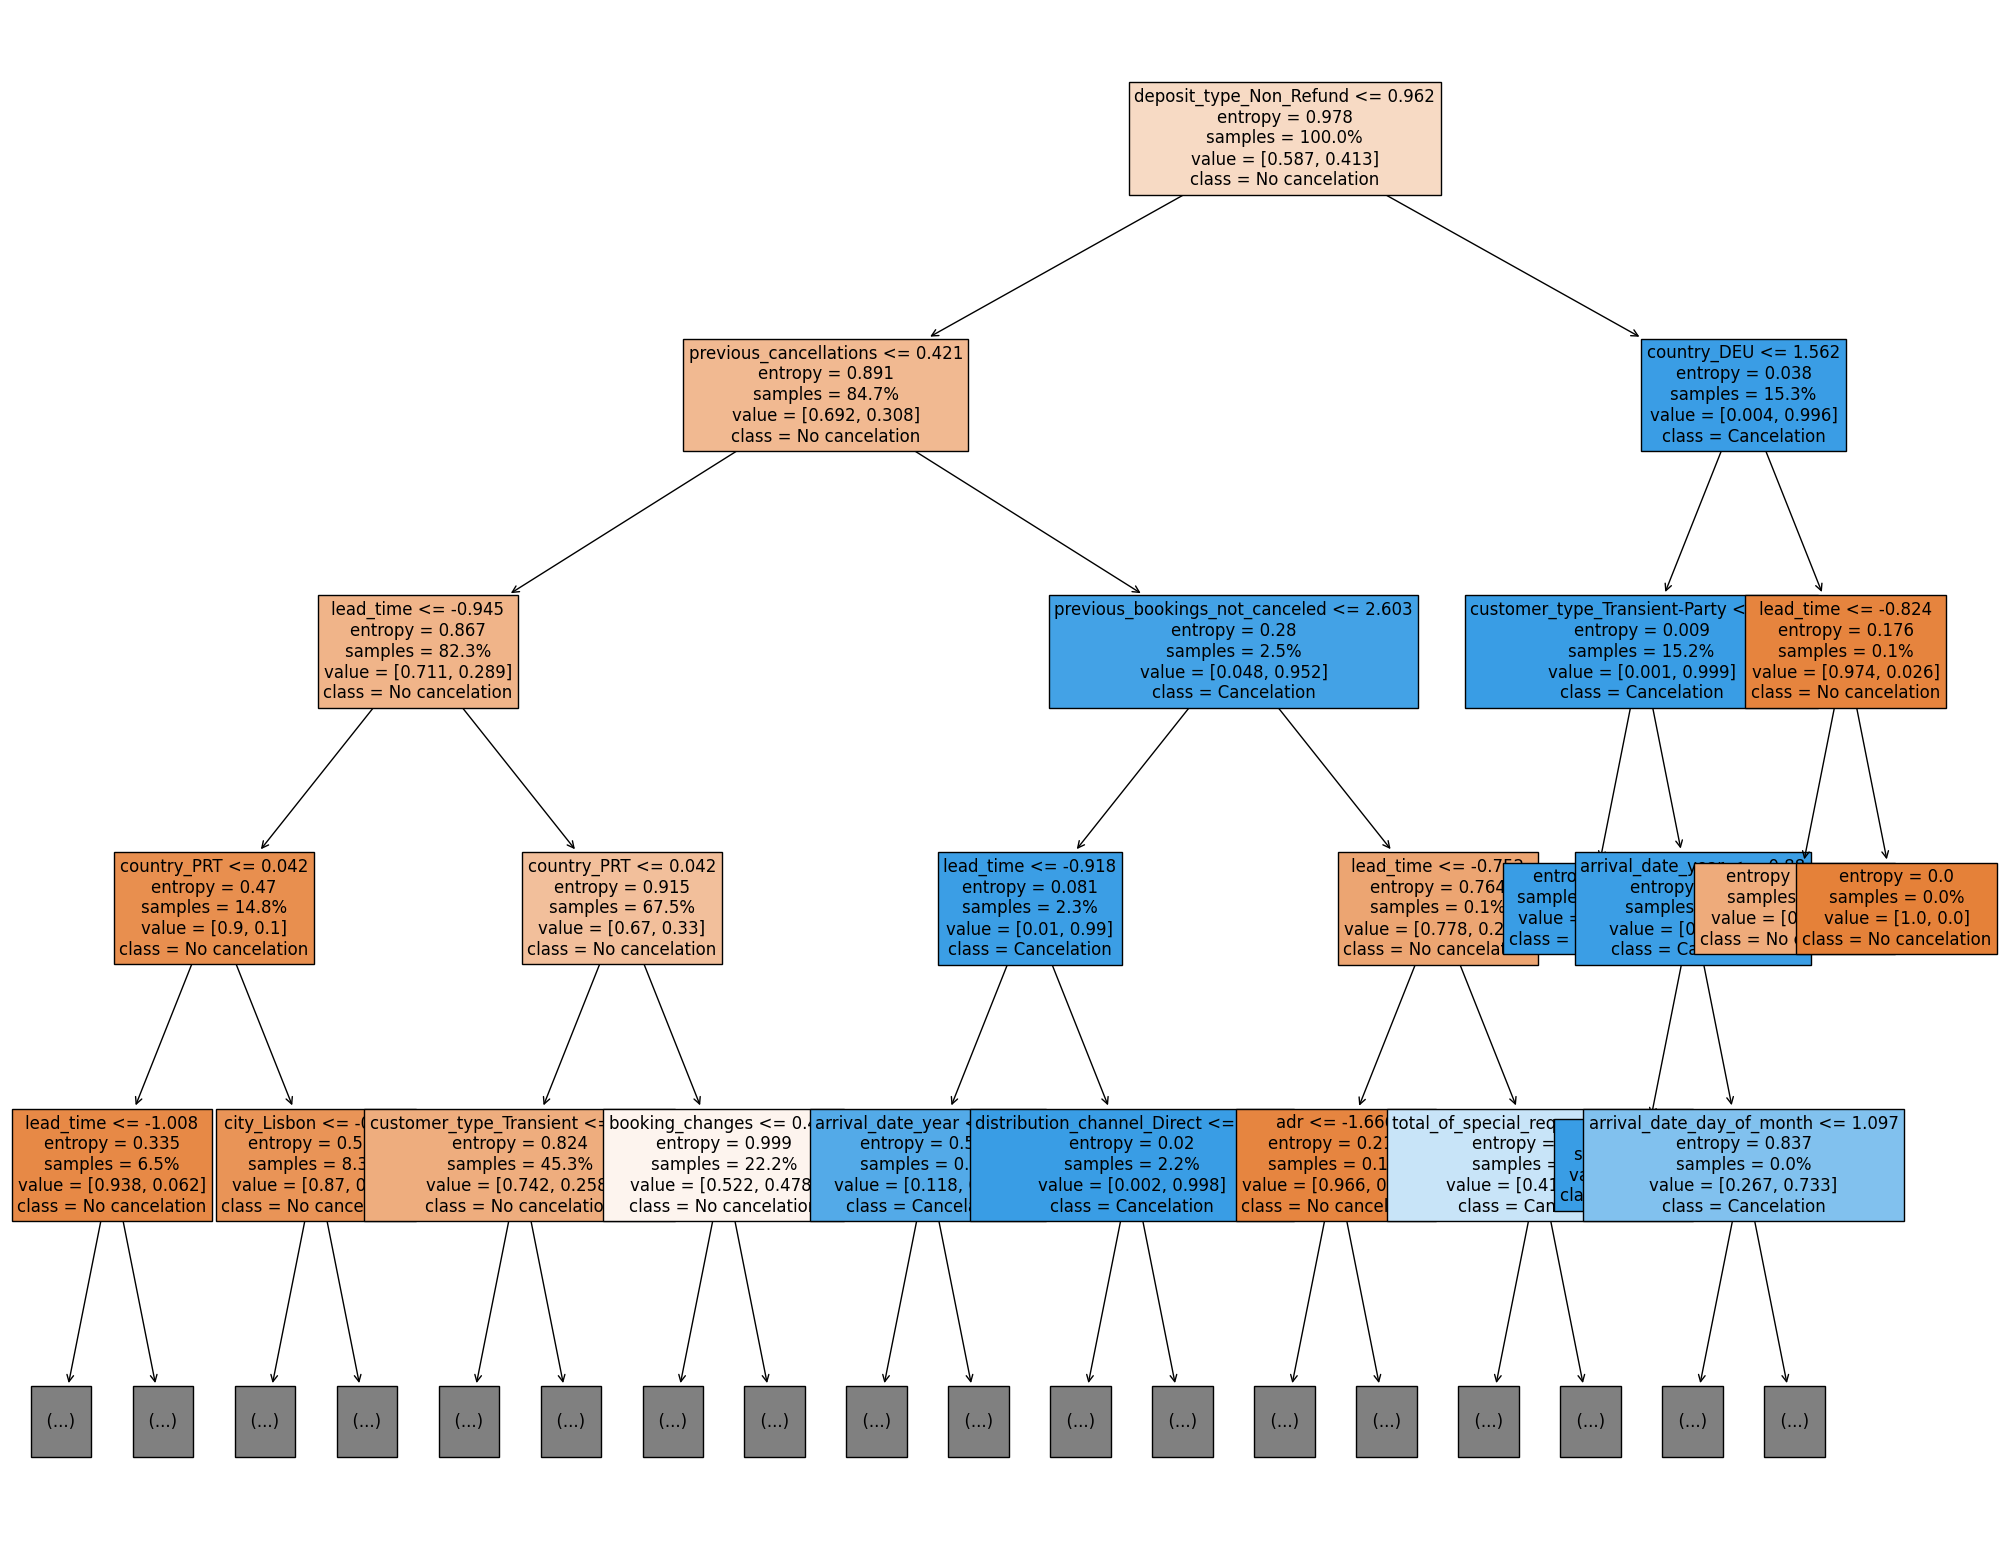

In [ ]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))

sktree.plot_tree(tree,
                 max_depth=4,
                 fontsize=12,
                 feature_names=X.columns,
                 class_names=['No cancelation', 'Cancelation'],
                 proportion=True,
                 filled=True);

# Random Forest

> Im nächsten Schritt möchten wir die Classification mit der Methode des Random Forest durchführen.

> Dafür laden wir die erforderliche Funktion `RandomForestClassifier()` und definieren diese als Methode für unsere Clasification. Hierbei definieren wir nur einen Parameter, und zwar `random_state`. Weitere Parameter werden wir ggf. im Laufe des Hyperparameter Tunings hinzufügen.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state=42)

> Wir trainieren unser Modell auf den Trainingsdaten.

In [ ]:
forest.fit(X_train_scaled, y_train_scaled)

RandomForestClassifier(random_state=42)

 > Wenden wir die Funktion `evaluate()` auf unser Modell mit den Trainingsdaten an, erhalten wir analog zum Decision Tree auch beim Random Forest eine extrem hohe Accuracy von 0.99.

In [ ]:
evaluate(forest, X_train_scaled, y_train_scaled)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     42679
           1       1.00      0.99      0.99     30052

    accuracy                           0.99     72731
   macro avg       0.99      0.99      0.99     72731
weighted avg       0.99      0.99      0.99     72731



> Viel relevanter für die Bewertung der Performance sind allerdings die Accuracy und der $F_1$-Score auf Basis der Testdaten.

> Unser Modell erzielt eine Accuracy von 0.88 und einen $F_1$-Score von 85%. Die Performance ist also bereits deutlich besser als bei den vorherigen Classification-Modellen.

In [ ]:
evaluate(forest, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     10670
           1       0.89      0.81      0.85      7513

    accuracy                           0.88     18183
   macro avg       0.88      0.87      0.87     18183
weighted avg       0.88      0.88      0.88     18183



## Hyperparameter Tuning

> Um unser Modell zu optimieren, führen wir im nächsten Schritt das Hyperparameter Tuning durch.

> Wir definieren erneut unsere Classification-Methode, allerdings ohne bereits einen `random_state` vorzugeben.

In [ ]:
forest_ht = RandomForestClassifier()

### RandomizedSearchCV

> Zu aller erst wollen wir wissen, welche Parameter sich aktuell im Random Forest Classifier befinden und uns damit für das Hyperparameter Tuning zur erfügung stehen.

In [ ]:
from pprint import pprint
print('Verfügbare Parameter in RandomForestClassifier() mit jeweiligem Default:\n')
pprint(forest_ht.get_params())

Verfügbare Parameter in RandomForestClassifier() mit jeweiligem Default:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


> Wir erstellen ein "Grid" in Form eines Dictionaries, in dem wir für alle relevanten Parameter einen Wertebereich bestimmen. Anhand dessen soll die optimale Parametereinstellung für unseren Random Forest gefunden werden.

In [ ]:
param_grid_forest = {
    'bootstrap': [True],
    'max_depth': [None,3, 5, 7, 9],
    'max_features': [4, 5, 7, 9, 11, 13,'auto','sqrt','log2',None],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 3, 5, 7],
    'n_estimators': [80, 100, 120],
    'random_state': [42]
}

> Im ersten Anlauf verwenden wir die Klasse `RandomizedSearchCV()` für unser Hyperparameter Tuning.

> Damit das Hyperparameter Tuning im nächsten Schritt nicht allzu lange dauert, setzen wir den Parameter `n_jobs` auf 10. Somit können 10 Vorgänge parallel ablaufen.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
ht_forest = RandomizedSearchCV(forest_ht, param_grid_forest, n_jobs=10)

> Mit der `fit()`-Funktion beginnen wir das Hyperparameter Tuning auf Basis der Trainingsdaten.

In [ ]:
ht_forest.fit(X_train_scaled, y_train_scaled)

KeyboardInterrupt: ignored

> Wir lassen uns die aus unserem Grid gewählten Parameter ausgeben, deren Modell die beste Performance erzielt hat.

In [ ]:
ht_forest.best_params_
# bei Tabea: random_state=42, min_samples_split=5, max_features=5
# bei 1: random_state=42, n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=None, max_depth=None, criterion='entropy', bootstrap=True

{'random_state': 42,
 'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': True}

> Um zu erkennen, ob das Hyperparameter Tuning unser Random Forest Modell tatsächlich verbessert hat, lassen wir uns mithilfe der `evaluate()`-Funktion unter Anderem die Accuracy und den $F_1$-Score ausgeben.

In [ ]:
evaluate(ht_forest, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10670
           1       0.88      0.81      0.85      7513

    accuracy                           0.88     18183
   macro avg       0.88      0.87      0.87     18183
weighted avg       0.88      0.88      0.88     18183



> Nach dem Hyperparameter Tuning mit `RandomizedSearchCV()` performt der Random Forest mit einer Accuracy von 0.74 deutlich schlechter als noch vorher.

> Wir möchten das Hyperparameter Tuning erneut durchführen, allerdings mit einem zweiten Grid mit angepassten Wertebereichen.

In [ ]:
param_grid_forest = {
    'criterion':  ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10, 15],
    'n_estimators': [100, 200, 300, 400, 500],
    'random_state': [42]
}

ht_forest = RandomizedSearchCV(forest_ht, param_grid_forest, n_jobs=10)

ht_forest.fit(X_train_scaled, y_train_scaled)

ht_forest.best_params_

evaluate(ht_forest, X_test_scaled, y_test_scaled)

> Wir erhalten eine Accuracy von ... und einen $F_1$-Score von ... . Demnach erzielen mit diesen Parametern eine deutliche Verbesserung zum ersten Versuch.

### GridSearchCV

> In einem letzten Versuch der Optimierung verwenden wir eine Alternative zum `RandomizedSearchCV()`: den `GridSearchCV()`.

> Dafür passen wir die Parameter in unserem Grid an bzw. minimieren ihren Umfang. Grund hierfür ist die hohe Komplexität und lange Laufzeit des Fittings.

In [ ]:
param_grid_ht = {
    'max_features': [5, 9, 13,'log2',None],
    'max_leaf_nodes': [20, 40, None],
    'max_samples': [1, 3, 5, 7],
    'min_samples_leaf': [1, 4],
    'min_samples_split': [3, 7],
    'n_estimators': [100, 120],
}

In [ ]:
#1 # läuft gerade durch
param_grid_forest = {
    'criterion':  ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10, 15],
    'n_estimators': [100, 200, 300, 400, 500],
    'random_state': [42]
}

> Wir definieren die Klasse `GridSearchCV()` für unser Hyperparameter Tuning und setzen den Parameter `n_jobs` erneut auf 10, um die Laufzeit des Prozesses zu minimieren.


In [ ]:
from sklearn.model_selection import GridSearchCV
ht_forest = GridSearchCV(forest_ht, param_grid_forest, n_jobs=10)

> Mit der `fit()`-Funktion beginnen wir das Hyperparameter Tuning auf Basis der Trainingsdaten.

In [ ]:
ht.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: ignored

> Wir lassen uns die aus unserem Grid gewählten Parameter ausgeben, deren Modell die beste Performance erzielt hat.

In [ ]:
ht_forest.best_params_

{'max_features': None,
 'max_leaf_nodes': 40,
 'max_samples': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 120}

> Um zu erkennen, ob das Hyperparameter Tuning mit `GridSearchCV` noch weiterverbessern konnte, lassen wir uns erneut die Accuracy und den $F_1$-Score ausgeben.

In [ ]:
evaluate(ht_forest, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.68      0.99      0.80     10670
           1       0.95      0.33      0.49      7513

    accuracy                           0.72     18183
   macro avg       0.81      0.66      0.65     18183
weighted avg       0.79      0.72      0.68     18183



## Finaler Random Forest

In [ ]:
forest = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=None, # wenn begrenzt, niedrigere accuracy
    max_features='sqrt',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=None,
    oob_score=False,
    random_state=42,
    verbose=0,
    warm_start=False)

In [ ]:
forest = RandomForestClassifier(
    random_state=42,
    min_samples_split=2,
    max_features='sqrt')

In [ ]:
forest.fit(X_train_scaled, y_train_scaled)

RandomForestClassifier(random_state=42)

In [ ]:
evaluate(forest, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     10670
           1       0.89      0.81      0.85      7513

    accuracy                           0.88     18183
   macro avg       0.88      0.87      0.87     18183
weighted avg       0.88      0.88      0.88     18183



In [ ]:
y_pred = forest.predict(X_test_scaled)

> Lassen wir uns die Confusion Matrix einmal visualisieren, erkennen wir, dass nahezu doppelt so viele der falschen Vorhersagen angeben, eine Buchung würde nicht storniert, wenn sie in Wirklichkeit storniert wird.

In [ ]:
# printing the confusion matrix
print(confusion_matrix(y_test_scaled, y_pred))

[[8451 2219]
 [2543 4970]]


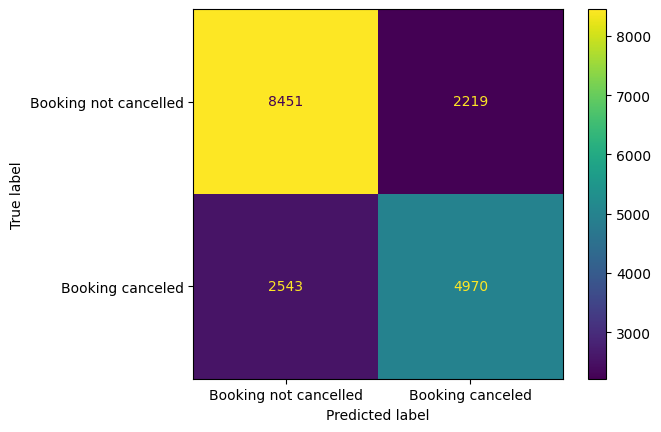

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    forest, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Booking not cancelled', 'Booking canceled'])

# **Gradient Boosting**



> Als nächstes Modell testen wir das additive Ensemble-Modell 'Gradient Boosting'. Hierbei werden schwächere Lernmodelle, i. d. R. Entscheindungsbäume schrittweise hinzugefügt und somit zu einem starken Lernmodell kombiniert. Im Gegensatz zum Random Forest werden beim Gradient Boosting gezielt schwache, fehlerhafte Lernmodelle genutzt, um diese zu kombinieren und Schwachstellen auszugleichen. Schritt für Schritt wird ein neues schwaches Lernmodell hinzugezogen und die Fehler korrigiert.

https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting




> Für Gradient Boosting benötigen wir den GradientBoostingClassifier. Der Parameter 'n_estimators' des Classifiers beschreibt dabei die Anzahl an schwächeren Lernmodellen, die sukzessive ins Trainingsmodell mitaufgenommen werden. DIe 'learning_rate' gibt den Hyperparameter sn, durch den Overfitting vermieden werden soll, der also das gesamte Modell reguliert. die Größe des decision trees wird durch 'max_depth' definiert. Über den Hyperparameter 'random_state' wird bestimmt, dass train- und test-Daten immer die selben Werte annehmen und somit das Machine Learning Modell immer die gleichen Ergebnisse liefert.



> Um GradientBossting als Classification durchführen zu können, müssen wir erstmal den gradientBoostingClassifier aus sklearn.ensemble importieren.



In [ ]:
from numpy import loadtxt
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

> Wir definieren die Parameter n_estimators, learning_rate und max_depth entsprechend der Python-Dokumentation und bestimmen einen random_state, um immer gleiche Ergebnisse mit Training und Evaluation zu erhalten.

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)

> Dann kann das Modell trainiert werden.

In [ ]:
gb.fit(X_train_scaled, y_train_scaled)

> Die Evaluation des trainierten Modells zeigt, dass die Accuracy bei 82% liegt, der f1-Score liegt knapp darunter, bei %.

In [ ]:
evaluate(gb, X_test_scaled, y_test_scaled)

## **Hyperparameter Tuning**

> Wir versuchen nun derneut durch Hyperparameter Tuning das Modell zu verbessern. Die ausgewählten Parameter speichern wir jeweils in einem Grid, das wir dann in die RandomizedSearchCV übergeben, die zufällig verschiedene Kombinationen der Parameter durchtestet und gleichzeitig cross-validation durchführt.

In [ ]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': loguniform(0.001, 1),
    'n_estimators': [50, 100, 200, 220, 250],
    'subsample': [0.3, 0.5, 0.8, 1.0],
    'max_depth': [3, 5, 7, 11],
    'min_samples_split': [1, 2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
}

> Wir übergeben den Classifier, das erstellte Grid, einen bestimmten random_state und die Anzahl an Interationen, die das Modell verschiedene Kombinationen austesten soll, in die Search-Funktion, hier `RandomizedSearchCV().`

In [ ]:
ht_gb = RandomizedSearchCV(GradientBoostingClassifier(), param_grid, random_state=42, n_iter=10)

> Dieses neue Modell können wir nun ebenfalls auf die Trainingsdaten anpassen.

In [ ]:
ht_gb.fit(X_train_scaled, y_train_scaled)

> Anschliesend interessiert uns, was die optimalen Parameter für die bestmögliche Kombination sind.

In [ ]:
ht_gb.best_params_

> Auch das optimierte Modell können wir evaluieren und sehen, dass sich das Ergebnis noch ein bisschen verbessert hat, im Vergleich zu ohne Hyperparameter Tuning.

In [ ]:
evaluate(ht_gb, X_test_scaled, y_test_scaled)

# **XGBoost**

> Das XGBoost-Modell ist eine spezielle Implementierung der Ensemble-Methode 'GradientBoosting', die sehr viele Etnscheidungsbäume trainiert, schrittweise miteinander kombiniert und durch Fehlerbeseitung der hinzugefügten Modelle optimiert. XGBoost steht dabei für 'Extreme Gradient Boosting', das optimierte Trainingsalgorithmen verwendet, Gradientenabstieg und Regularisierungstechniken kombiniert, um Overfitting zu reduzieren und ein leistungsstarkes, effizientes Gradient Bossting Modell zu bieten. Es eignet sich besonders für große Datenmengen.
> XGBoost performt meist sehr gut und erzielt eine hohe Accuracy.

> Für die Implementierung importieren wir den XGBClassifier aus dem package 'xgboost' und definieren die Parameter 'objective', 'alpha' (Hyperparameter für die Stärke der L1-Regularisierung) und lambda (L2-Regularisierung). Danach kann das Modell trainiert und als Entscheidungsbaum geplottet werden.

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

params = {
    'objective': 'binary:logistic',
    'alpha': 0.5,    # L1-Regularisierung
    'lambda': 0.5    # L2-Regularisierung
}

xgb = XGBClassifier(**params)
xgb.fit(X_train_scaled, y_train_scaled)

plot_tree(xgb)
plt.show()

> Wir können uns nun zu dem Modell die Evaluationswerte Accuracy und f1-score anschauen. XGBoost performt im Vergleich zu GradientBoosting deutlich besser.

In [ ]:
evaluate(xgb, X_test_scaled, y_test_scaled)

## **Hyperparameter Tuning**

> Wir versuchen nun durch Hyperparameter Tuning das Modell nochmals zu verbessern. Dafür definieren wir eine potentiell gute Auswahl an Parametern (auf Basis von Recherche) und geben sie in ein Grid. Dieses Grid kann erneut mit dem Classifier und der Spezifikation der cross-validation in die RandomizedSearchCV übergeben und das Modell auf die skalierten Trainingsdaten gefittet werden.
> Schritt für Schritt passen wir die Parameter an, da sich das Ergebnis im Verlgeich zu vor Hyperparameter Tuning leicht verschlechtert hat. Dies kann zwar auch an der Kombination mit cross-validation liegen (da nochmal mit neuen Validierungs-Daten verglichen wird, die ggf. schlechter vom Modell abgebildet werden können, der Generalization Error des Models wird allerdings durch cross-validation nicht erhöht).

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # Lernrate
    'max_depth': [3, 5, 6, 10],  # Maximale Tiefe der Bäume
    'n_estimators': [50, 100, 200],  # Anzahl der Bäume
    'min_child_weight': [1, 5, 10, 100],  # Mindestgewicht der Beispiele in einem Blatt
    'lambda' : [1,0.5],
    'alpha': [0.5,0],
    'seed': [42]
}

ht_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, cv=5)
ht_xgb.fit(X_train_scaled, y_train_scaled)

> Wir können uns nun die besten Parameter ausgeben lassen.

In [ ]:
ht_xgb.best_params_

> Auch hier evaluieren wir wieder die Ergebnisse nach Hyperparameter Tuning, sehen allerdings, dass das Ergebnis nicht besser ist, als die des Random Forest.

In [ ]:
evaluate(ht_xgb, X_test_scaled, y_test_scaled)